## 1. Exploratory Data Analysis (EDA)

#####  Conduct a thorough exploration of the provided datasets. This includes understanding the structure, identifying missing values, and summarizing key statistics. Generate visualizations to understand the distribution of important variables, relationships between different variables, and any other patterns or anomalies in the data such as peculiar patterns or outliers.

- Import required packages

In [ ]:
# necessary imports
import pandas as pd
import py7zr
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

from sklearn.linear_model import LassoCV
from sklearn.linear_model import LogisticRegressionCV
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

- Read the data & Clean data

In [ ]:
# Read the datasets
data1 = pd.read_csv("longyear-obese-hypertensive-40-57-medical-SMALL-sample.csv")
data2 = pd.read_csv("longyear-obese-hypertensive-40-75-scripts-SMALL-sample.csv")
# Print the datasets
data1.head()

journey_id                        episode_id  \
0  00006390c96ebfffed580074c35a16a7  d5e15811af1d772f54af52f3560be0a5   
1  00006390c96ebfffed580074c35a16a7  d5e15811af1d772f54af52f3560be0a5   
2  00006390c96ebfffed580074c35a16a7  e25e5285e4f66d35c9840bf4e040fe73   
3  00006390c96ebfffed580074c35a16a7  e25e5285e4f66d35c9840bf4e040fe73   
4  00006d564a4718c744f1bbf1b6c5f8c3  42ba4419d9ad7c9293d76686fb608f10   

                                            visit_id  \
0  f22b7ab885c44afae5449d74f8498f53aea1b2cfa79598...   
1  f22b7ab885c44afae5449d74f8498f53aea1b2cfa79598...   
2  3f45ba8ebef02b0c09b09e864e57ba5ee9d6bc9acf1c39...   
3  3f45ba8ebef02b0c09b09e864e57ba5ee9d6bc9acf1c39...   
4  9e4534892128401c693a6ab2ea758cd6a0a6484972168b...   

                                        encounter_id  claim_date  \
0  d5a7dc61071d977cef9ff762973d360f4bcf15a19790d9...  2020-07-13   
1  d5a7dc61071d977cef9ff762973d360f4bcf15a19790d9...  2020-07-13   
2  c60da949b58f0351c8781c062f65d92bce76d9532d1632...  2023-07-19   
3  c60da949b58f0351c8781c062f65d92bce76d9532d1632...  2023-07-19   
4  da5cef18317c14180ed561a84001d8a033d724d541a2c0...  2023-08-11   

  patient_state  patient_short_zip  patient_age patient_gender  \
0            CA              922.0         55.0              M   
1            CA              922.0         55.0              M   
2            CA              922.0         60.0              M   
3            CA              922.0         60.0              M   
4            CA              900.0         55.0              F   

         place_of_service  ...  diag_4  diag_5 rev_center_code  \
0                    Home  ...     NaN     NaN             NaN   
1                    Home  ...     NaN     NaN             NaN   
2                  Office  ...  L03115  L03116             NaN   
3                  Office  ...  L03115  L03116             NaN   
4  Independent Laboratory  ...     NaN     NaN             NaN   

   rev_center_units  proc_code proc_modifier proc_units  line_charge  \
0               1.0      A6549            NU        2.0       300.00   
1               1.0      A6549            NU        2.0       300.00   
2               1.0      3074F           NaN        1.0         0.00   
3               1.0      3078F           NaN        1.0         0.00   
4               1.0      80053           NaN        1.0        88.07   

  claim_charge smart_allowed  
0       300.00        974.13  
1       300.00        974.13  
2         0.00         46.57  
3         0.00         56.38  
4        88.07         15.16  

[5 rows x 34 columns]

In [ ]:
# Print the datasets
data2.head()

journey_id  cohort_id  \
0  00006390c96ebfffed580074c35a16a7         16   
1  00006390c96ebfffed580074c35a16a7         16   
2  00006390c96ebfffed580074c35a16a7         16   
3  00006390c96ebfffed580074c35a16a7         16   
4  00006390c96ebfffed580074c35a16a7         16   

                                            claim_id patient_gender  \
0  60618bd8d37311da702bf9349e76f8c26d515c082e136f...              M   
1  dbeb47defd161331e43f4e359e8d43e4ef7546ff58359b...              M   
2  02927d081fad10afffcba79bad27f94ff52c98e968aaec...              M   
3  a412c986e2503a5140ed1482e88b5ec50feeedaf2d89ec...              M   
4  b65634edd78998753fe9606b142b2fff7765d6c576973c...              M   

  patient_state  patient_zip patient_dob  pharmacy_npi  pharmacist_npi  \
0            CA        922.0  1961-01-01  1.215361e+09             NaN   
1            CA        922.0  1961-01-01  1.215361e+09             NaN   
2            CA        922.0  1961-01-01  1.215361e+09             NaN   
3            CA        922.0  1961-01-01  1.215361e+09             NaN   
4            CA        922.0  1961-01-01  1.215361e+09             NaN   

  prescriber_npi  ...      bin plan_pay reject_code_1 reject_code_3  \
0     1750479168  ...  22659.0      NaN           NaN           NaN   
1     1750479168  ...  22659.0      NaN           NaN           NaN   
2     1750479168  ...  22659.0      NaN           NaN           NaN   
3     1750479168  ...  22659.0      NaN           NaN           NaN   
4     1750479168  ...  22659.0      NaN           NaN           NaN   

  reject_code_4 reject_code_5          ndc  active  start_date end_date  
0           NaN           NaN  47335067381    True      190001      NaN  
1           NaN           NaN  47335067381    True      190001      NaN  
2           NaN           NaN  47335067381    True      190001      NaN  
3           NaN           NaN  47335067381    True      190001      NaN  
4           NaN           NaN  65862059805    True      190001      NaN  

[5 rows x 48 columns]

In [ ]:
# Print Basic information of data
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623525 entries, 0 to 623524
Data columns (total 34 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   journey_id         623525 non-null  object 
 1   episode_id         623525 non-null  object 
 2   visit_id           621650 non-null  object 
 3   encounter_id       623525 non-null  object 
 4   claim_date         623525 non-null  object 
 5   patient_state      623525 non-null  object 
 6   patient_short_zip  623512 non-null  float64
 7   patient_age        616980 non-null  float64
 8   patient_gender     623393 non-null  object 
 9   place_of_service   484555 non-null  object 
 10  visit_type         600454 non-null  object 
 11  payor              608936 non-null  object 
 12  payor_channel      586086 non-null  object 
 13  ref_npi            297501 non-null  float64
 14  hcp_npi            434653 non-null  float64
 15  hcp_taxonomy       428209 non-null  object 
 16  hc

In [ ]:
# Summarize the key statistics
data1.describe()

patient_short_zip    patient_age       ref_npi       hcp_npi  \
count      623512.000000  616980.000000  2.975010e+05  4.346530e+05   
mean          907.514954      59.416910  1.502083e+09  1.508734e+09   
std            40.034735       9.946158  2.868359e+08  2.825083e+08   
min            74.000000      30.000000  1.003001e+09  1.003001e+09   
25%           900.000000      55.000000  1.255437e+09  1.265668e+09   
50%           911.000000      60.000000  1.508952e+09  1.528016e+09   
75%           922.000000      65.000000  1.740350e+09  1.740376e+09   
max           999.000000      80.000000  1.992999e+09  1.993000e+09   

            hco_npi  rev_center_code  rev_center_units     proc_units  \
count  6.177890e+05    113926.000000     621558.000000  621331.000000   
mean   1.485095e+09       456.083449          1.243236       4.319060   
std    2.859965e+08       451.591644          2.458118      55.208116   
min    1.003006e+09         1.000000        -14.000000       0.000000   
25%    1.245340e+09       301.000000          1.000000       1.000000   
50%    1.467631e+09       320.000000          1.000000       1.000000   
75%    1.720295e+09       521.000000          1.000000       1.000000   
max    1.992995e+09      3103.000000        730.000000   12473.000000   

         line_charge   claim_charge  smart_allowed  
count  623525.000000  623525.000000  623525.000000  
mean      482.437268     482.437268     190.295642  
std      3582.592825    3582.592825     509.339625  
min         0.000000       0.000000       0.000000  
25%        10.000000      10.000000      18.190000  
50%        70.000000      70.000000      75.230000  
75%       200.000000     200.000000     182.360000  
max    778750.000000  778750.000000   45035.960000

In [ ]:
# Print Basic information of data
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894623 entries, 0 to 894622
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   journey_id                     894623 non-null  object 
 1   cohort_id                      894623 non-null  int64  
 2   claim_id                       894623 non-null  object 
 3   patient_gender                 894623 non-null  object 
 4   patient_state                  894623 non-null  object 
 5   patient_zip                    894501 non-null  float64
 6   patient_dob                    894619 non-null  object 
 7   pharmacy_npi                   839958 non-null  float64
 8   pharmacist_npi                 21578 non-null   float64
 9   prescriber_npi                 891155 non-null  object 
 10  primary_care_npi               3569 non-null    object 
 11  group_id                       273621 non-null  object 
 12  date_of_service               

In [ ]:
# Summarize the key statistics
data2.describe()

cohort_id    patient_zip  pharmacy_npi  pharmacist_npi  \
count  894623.000000  894501.000000  8.399580e+05    2.157800e+04   
mean       16.065902     886.761085  1.505555e+09    1.475807e+09   
std         0.248110     121.719342  2.862710e+08    2.925536e+08   
min        16.000000     100.000000  1.003010e+09    1.003455e+09   
25%        16.000000     900.000000  1.255441e+09    1.154909e+09   
50%        16.000000     913.000000  1.497865e+09    1.457999e+09   
75%        16.000000     922.000000  1.740323e+09    1.689011e+09   
max        17.000000     992.000000  6.167056e+09    1.992978e+09   

              ndc11  ndc11_original  number_of_refills_authorized  \
count  8.946230e+05    9.420300e+04                 849519.000000   
mean   3.913810e+10    1.318060e+10                      2.496945   
std    2.808575e+10    2.446082e+10                      6.861014   
min    2.143301e+06    0.000000e+00                     -1.000000   
25%    9.046999e+08    0.000000e+00                      0.000000   
50%    4.948305e+10    0.000000e+00                      1.000000   
75%    6.586206e+10    9.551004e+08                      3.000000   
max    9.920701e+10    9.920705e+10                     99.000000   

       diagnosis_code_type  quantity_prescribed_original  quantity_dispensed  \
count        111634.000000                  322348.00000        8.946160e+05   
mean              9.999113                      11.03221        7.151479e+01   
std               0.029767                      85.75864        3.589294e+03   
min               9.000000                       0.00000        0.000000e+00   
25%              10.000000                       0.00000        3.000000e+01   
50%              10.000000                       0.00000        3.000000e+01   
75%              10.000000                       0.00000        9.000000e+01   
max              10.000000                   10000.00000        3.390291e+06   

       ...  coupon_type  coupon_value_amount  pharmacy_submitted_cost  \
count  ...       2030.0                  5.0             7.850810e+05   
mean   ...         88.0                 99.0             4.547052e+02   
std    ...          0.0                  0.0             4.805967e+04   
min    ...         88.0                 99.0            -7.370000e+00   
25%    ...         88.0                 99.0             2.799000e+01   
50%    ...         88.0                 99.0             9.526000e+01   
75%    ...         88.0                 99.0             3.220600e+02   
max    ...         88.0                 99.0             4.252220e+07   

         patient_pay  copay_coinsurance            bin       plan_pay  \
count  601820.000000      411383.000000  786240.000000  491878.000000   
mean       10.890529           7.075289  121957.811418     167.327912   
std        96.639674          59.716082  230816.951281     802.330352   
min      -189.700000       -3198.400000       0.000000   -1458.620000   
25%         0.000000           0.000000    4336.000000       2.290000   
50%         0.000000           1.350000   17010.000000      13.580000   
75%         4.000000           4.150000   22659.000000      36.300000   
max     25598.020000        6923.160000  900020.000000   50307.120000   

                ndc     start_date       end_date  
count  8.946230e+05  894623.000000   32448.000000  
mean   3.913810e+10  190740.803998  201718.841285  
std    2.808575e+10    2830.185124     400.902819  
min    2.143301e+06  190001.000000  201001.000000  
25%    9.046999e+08  190001.000000  201411.000000  
50%    4.948305e+10  190001.000000  201802.000000  
75%    6.586206e+10  190001.000000  201907.000000  
max    9.920701e+10  202308.000000  202307.000000  

[8 rows x 25 columns]

- 'diag_' column is essential for outcome variables (Y)

In [ ]:
# 1. Select 'diag_' columns
diag_columns = [col for col in data1.columns if col.startswith('diag_')]
df_diag = data1[diag_columns]

# 2. Combine values
combined_list = df_diag.values.flatten().tolist()
combined_list = [x for x in combined_list if pd.notna(x)]

# 3. Process first three digits (same as before)
first_three_counts = {}
for diag_code in combined_list:
    first_three = diag_code[:3]
    first_three_counts[first_three] = first_three_counts.get(first_three, 0) + 1


In [ ]:
import operator
# Sort the dictionary items by count (descending order)
sorted_counts = sorted(first_three_counts.items(), key=operator.itemgetter(1), reverse=True)

# convert the list into dataframe row
OOC = pd.DataFrame(sorted_counts)

 # add columns
OOC.columns = ['Firtst3NumofOOC', 'Number']

# display
OOC

Firtst3NumofOOC  Number
0                E11  233629
1                I10  199537
2                E78  113939
3                Z00   95083
4                E66   69689
...              ...     ...
1388             L75       1
1389             J17       1
1390             F18       1
1391             W52       1
1392             W89       1

[1393 rows x 2 columns]

##  Histogram to see the whole picture

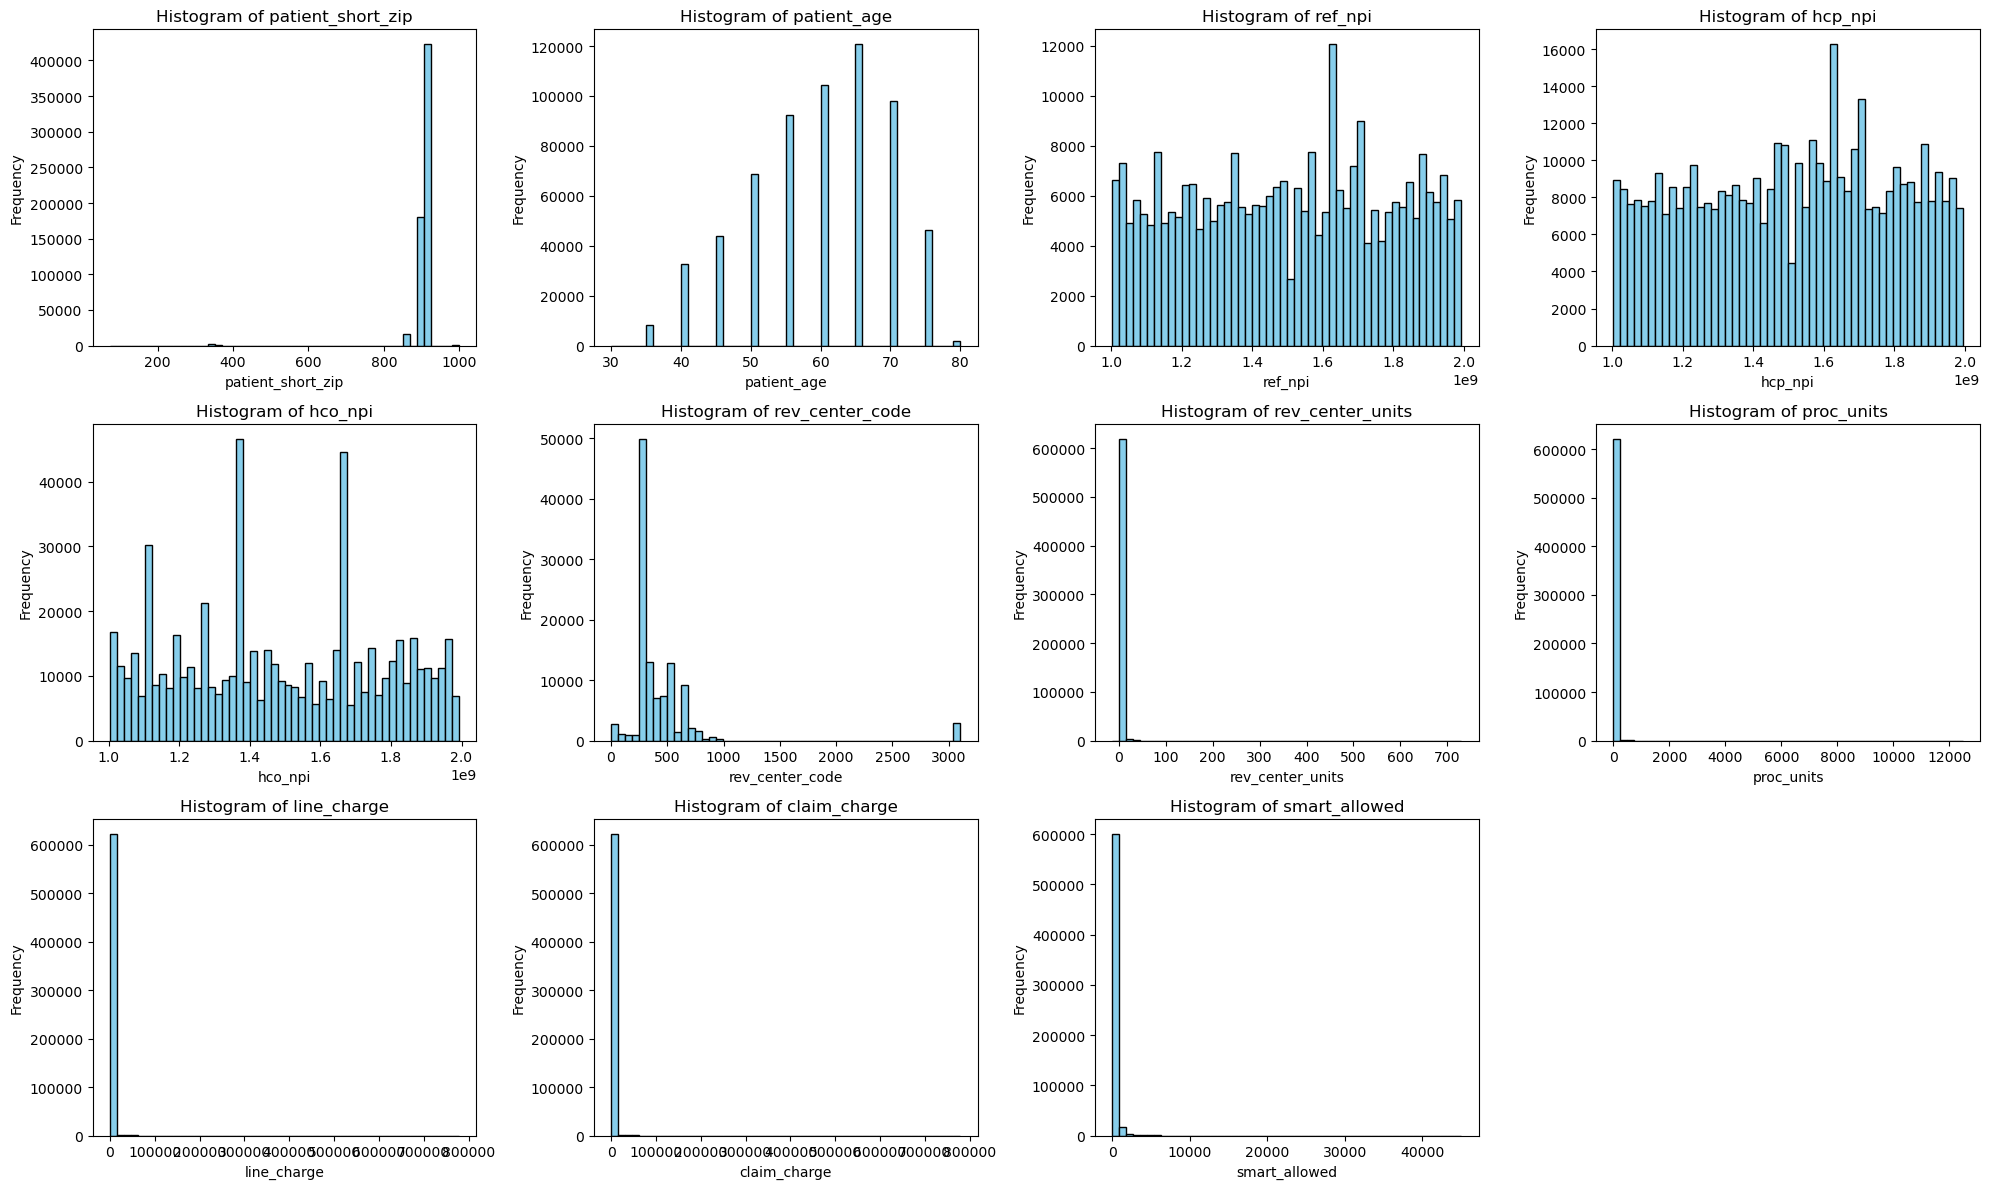

In [ ]:
# Filtering out non-numeric columns and columns with all null values
numeric_df = data1.select_dtypes(include=[np.number])

# Number of numeric variables
num_vars = len(numeric_df.columns)

# Calculate the number of rows and columns for the subplots
n_cols = 4
n_rows = (num_vars + n_cols - 1) // n_cols  # Ceiling division

# Create a figure with subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, n_rows * 4))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over the numeric variables and plot histograms
for ax, var in zip(axes, numeric_df.columns):
    ax.hist(numeric_df[var], bins=50, color='skyblue', edgecolor='black')
    ax.set_title(f'Histogram of {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Frequency')

# Hide any unused axes
for ax in axes[len(numeric_df.columns):]:
    ax.set_visible(False)

# Adjust the layout
plt.tight_layout()
plt.show()

In [ ]:
numeric_df.columns

Index(['patient_short_zip', 'patient_age', 'ref_npi', 'hcp_npi', 'hco_npi',
       'rev_center_code', 'rev_center_units', 'proc_units', 'line_charge',
       'claim_charge', 'smart_allowed'],
      dtype='object')

- Insight for histogram :

patient_short_zip : patients are focused on very specific area

patient_age : patients are focused on 60~70, but 65 are majority

hco_npi: 3 hco seems the highest

rev_center_code: there is 1 rev center code that is expremely higher than others

rev_center_units: there is 1 rev center code that is expremely higher than others

line_charge: most of the data fall into left bins near zero

claim_charge: most of the data fall into left bins near zero

smart_allowed: most of the data fall into left bins near zero

- Explore a bit: Plots

Bar Chart for Patients' States

Bar Chart for top 5 number of OOC

Histogram of Age of Patients who are diagnosed of Obesity

Line Chart of Number of Patients who are diagnosed of hypertension by patient gender

Bar Chart of number of patients who received Ozempic or not

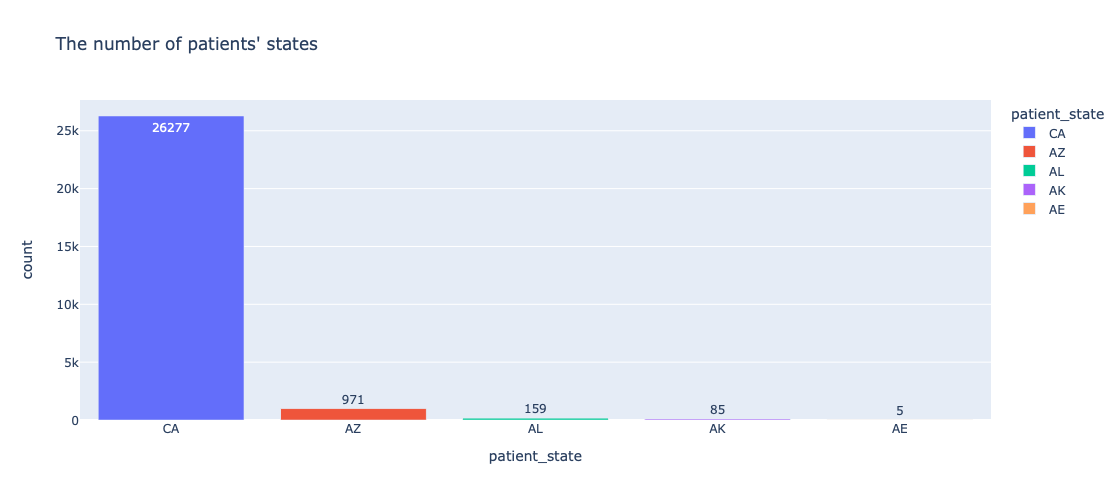

In [ ]:
# Check the number of patients' states
patient_state_cnt = data1.groupby('patient_state')['journey_id'].nunique().reset_index(name = 'count').sort_values('count', ascending=False)

# plot a bar plot
px.bar(patient_state_cnt, x="patient_state", y="count", title="The number of patients' states",
       color="patient_state", width=800,height=500,text="count")

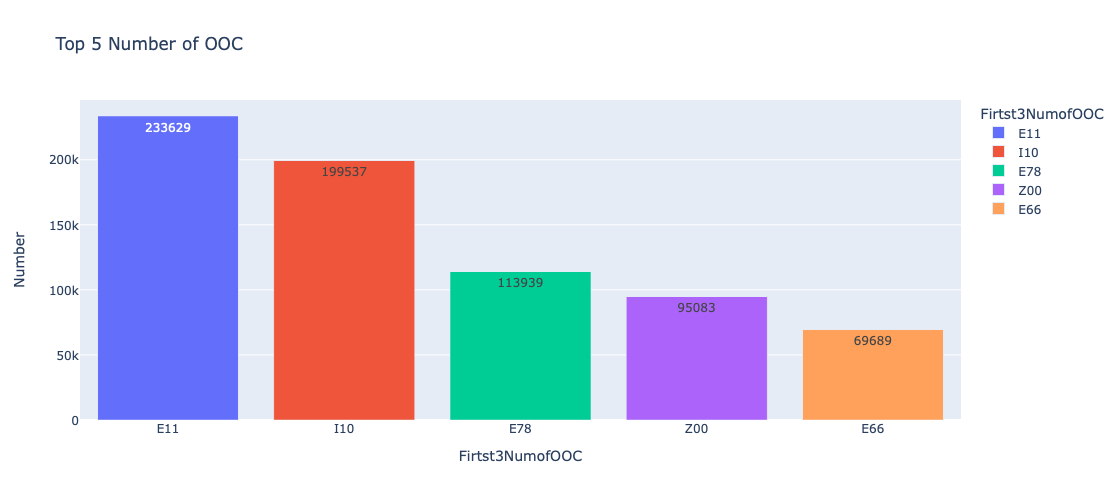

In [ ]:
# Filter top 5 Number of OOC
OOC_top5 = OOC.loc[:4]

# Bar Chart for top 5 number of OOC
px.bar(OOC_top5, x="Firtst3NumofOOC", y="Number", title="Top 5 Number of OOC",
       color="Firtst3NumofOOC", width=800,height=500,text="Number")

- Insight


        E11  Type 2 diabetes mellitus

        I10*  Essential (primary) hypertension

        E78  Disorders of lipoprotein metabolism and other lipidemias

        Z00  Encounter for general examination without complaint, suspected or reported diagnosis

        E66*  Overweight and obesity

The bar chart indicates that Type 2 diabetes mellitus (E11) has the highest occurrence, followed by essential hypertension (I10) and lipid metabolism disorders (E78), with general health examinations (Z00) and issues related to overweight and obesity (E66) also being significant. This suggests a prevalence of chronic conditions related to lifestyle and diet, underscoring the importance of targeted public health interventions and awareness campaigns to address these health concerns.

- For Overweight and obesity (E66)

In [ ]:
# Set a dataframe to store the filter of pateints who are diagnosed of obesity information
df_obesity = data1[data1['diag_1'].str.startswith("E66")|
      data1['diag_2'].str.startswith("E66")|
      data1['diag_3'].str.startswith("E66")|
      data1['diag_4'].str.startswith("E66")|
      data1['diag_5'].str.startswith("E66")]

# Check the dataframe
df_obesity['diag'] = "Obesity"
df_obesity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63026 entries, 22 to 623506
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   journey_id         63026 non-null  object 
 1   episode_id         63026 non-null  object 
 2   visit_id           62900 non-null  object 
 3   encounter_id       63026 non-null  object 
 4   claim_date         63026 non-null  object 
 5   patient_state      63026 non-null  object 
 6   patient_short_zip  63018 non-null  float64
 7   patient_age        62224 non-null  float64
 8   patient_gender     63023 non-null  object 
 9   place_of_service   50211 non-null  object 
 10  visit_type         59858 non-null  object 
 11  payor              60251 non-null  object 
 12  payor_channel      58314 non-null  object 
 13  ref_npi            24221 non-null  float64
 14  hcp_npi            49907 non-null  float64
 15  hcp_taxonomy       49357 non-null  object 
 16  hcp_specialty      49357 

In [ ]:
# Check the obesity pateint gander distribution
patients_gender_cnt = df_obesity.groupby(['diag', 'patient_gender'])['journey_id'].nunique().reset_index(name = 'count')
total_cnt = patients_gender_cnt.groupby('diag')['count'].transform('sum')
patients_gender_cnt['gender_ratio'] = patients_gender_cnt['count']/total_cnt
patients_gender_cnt

diag patient_gender  count  gender_ratio
0  Obesity              F   6422      0.587235
1  Obesity              M   4514      0.412765

- Insight

The data indicates a higher prevalence of obesity diagnoses among females (58.72%) compared to males (41.28%), with a total of 6,422 cases in females and 4,514 in males. This gender disparity suggests potential differences in either the reporting or incidence of obesity, which may warrant further investigation into the underlying causes, such as biological, behavioral, or societal factors.

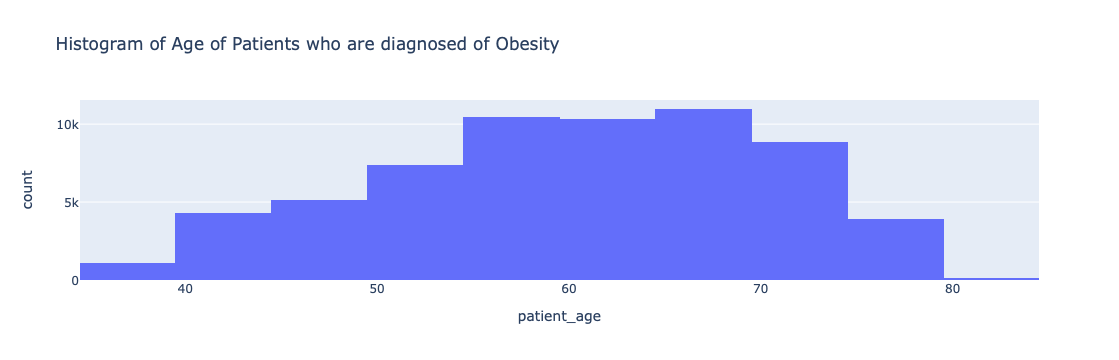

In [ ]:
# Histogram of Age of Patients who are diagnosed of Obesity
fig = px.histogram(df_obesity, x="patient_age", title="Histogram of Age of Patients who are diagnosed of Obesity")
fig.show()

- Insight:

The histogram of patient ages diagnosed with obesity shows a prominent peak in the age group 50-60, indicating that this demographic has the highest incidence of obesity diagnoses within the observed population. There is a notable increase in obesity diagnoses starting from the age group of 40, which remains high up to the 70s before declining.

- For Essential (primary) hypertension (I10)

In [ ]:
df_hypertension = data1[data1['diag_1'].str.startswith("I10")|
      data1['diag_2'].str.startswith("I10")|
      data1['diag_3'].str.startswith("I10")|
      data1['diag_4'].str.startswith("I10")|
      data1['diag_5'].str.startswith("I10")]

df_hypertension['diag'] = "Hypertension"
df_hypertension.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154197 entries, 6 to 623524
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   journey_id         154197 non-null  object 
 1   episode_id         154197 non-null  object 
 2   visit_id           154005 non-null  object 
 3   encounter_id       154197 non-null  object 
 4   claim_date         154197 non-null  object 
 5   patient_state      154197 non-null  object 
 6   patient_short_zip  154197 non-null  float64
 7   patient_age        152871 non-null  float64
 8   patient_gender     154177 non-null  object 
 9   place_of_service   117084 non-null  object 
 10  visit_type         148911 non-null  object 
 11  payor              148431 non-null  object 
 12  payor_channel      142942 non-null  object 
 13  ref_npi            66804 non-null   float64
 14  hcp_npi            110959 non-null  float64
 15  hcp_taxonomy       109870 non-null  object 
 16  hcp_spe

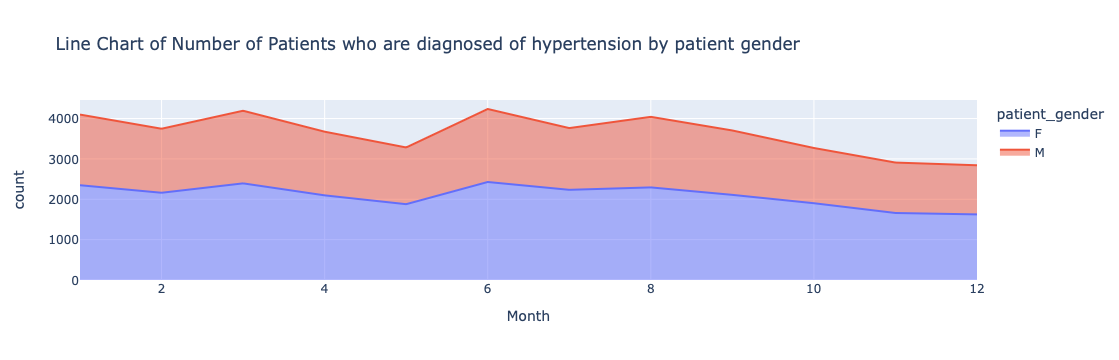

In [ ]:
# Extract Claim Date's month
from datetime import datetime

# df_hypertension['claim_date'] = pd.to_datetime(df_hypertension['claim_date'], format='%m/%d/%y')
df_hypertension['claim_date'] = pd.to_datetime(df_hypertension['claim_date'], format='%Y-%m-%d')
df_hypertension['Month'] = df_hypertension['claim_date'].dt.month

# Count Number of Patients who are diagnosed of hypertension by patient gender
Num_Claim_monthly = df_hypertension.groupby(['Month','patient_gender'], as_index=False)['journey_id'].nunique()
Num_Claim_monthly.rename(columns = {"journey_id" : "count"}, inplace = True)

# Line Chart of Number of Patients who are diagnosed of hypertension by patient gender
fig = px.area(Num_Claim_monthly, x="Month", y = 'count', title = 'Line Chart of Number of Patients who are diagnosed of hypertension by patient gender', color = 'patient_gender')
fig.show()

- Insight:

The line chart presents the monthly counts of patients diagnosed with hypertension, differentiated by gender. It shows that, throughout the year, males consistently have a higher count of hypertension diagnoses than females. There's a peak in diagnoses for both genders around mid-year, possibly indicating seasonal variations in health check-ups or reporting.

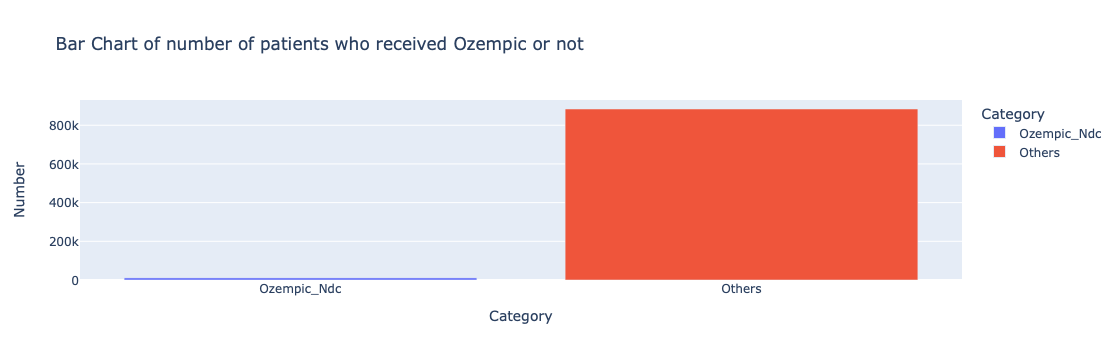

In [ ]:
# Set a list to store the Ozempic's ndc numbers
ndc_list = [169413001, 169413013, 169413211, 169413212, 169413290, 169413297, 169413602, 169413611, 169418103, 169418113, 169418190, 169418197, 169477211, 169477212, 169477290, 169477297]

# Filter the data where ndc values are equal to Ozempic's ndc
filtered_data = data2[data2['ndc'].isin(ndc_list)]

# Calculate the row number
num_rows_in = len(filtered_data)

# Filter rows where ndc values are not equal to Ozempic's ndc
filtered_data_not = data2[~data2['ndc'].isin(ndc_list)].dropna(subset=['ndc'])

# Calculate the row number
num_rows_not = len(filtered_data_not)

# Store in a dataframe
Num = pd.DataFrame({'Category': ['Ozempic_Ndc', 'Others'], 'Number': [num_rows_in, num_rows_not]})

# Bar Chart of number of patients who received Ozempic or not
fig = px.bar(Num, x='Category', y='Number', title='Bar Chart of number of patients who received Ozempic or not', color = "Category")
fig.show()


- Insight

The 'Others' category vastly outnumbers the Ozempic_Ndc group, indicating that Ozempic is prescribed to a relatively small portion of patients within the observed dataset.

##  Obesity analysis

In [ ]:
df_obesity = data1[data1['diag_1'].str.startswith("E66")|
      data1['diag_2'].str.startswith("E66")|
      data1['diag_3'].str.startswith("E66")|
      data1['diag_4'].str.startswith("E66")|
      data1['diag_5'].str.startswith("E66")]

In [ ]:
df_obesity['diag'] = "Obesity"

####  Obesity with gender

In [ ]:
patients_gender_cnt = df_obesity.groupby(['diag', 'patient_gender'])['journey_id'].nunique().reset_index(name = 'count')
total_cnt = patients_gender_cnt.groupby('diag')['count'].transform('sum')
patients_gender_cnt['gender_ratio'] = patients_gender_cnt['count']/total_cnt
patients_gender_cnt

diag patient_gender  count  gender_ratio
0  Obesity              F   6422      0.587235
1  Obesity              M   4514      0.412765

### - 59% of obesity are female, 41% are male

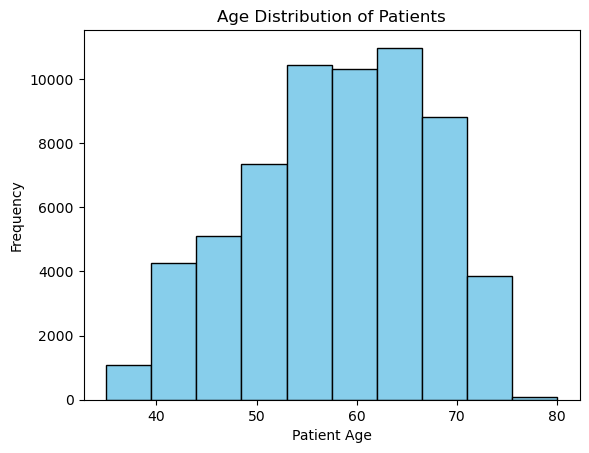

In [ ]:
# Age distribution of patients
plt.hist(df_obesity['patient_age'], bins=10, color='skyblue', edgecolor='black')

plt.xlabel('Patient Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Patients')

# Show the histogram
plt.show()

### - Age distribution for obesity patients are normally distributed and it is focused on the age of 55~65

####   Obesity with visit_type

In [ ]:
patients_visit_type_cnt = df_obesity.groupby(['diag', 'visit_type'])['journey_id'].nunique().reset_index(name = 'count')
total_cnt = patients_visit_type_cnt.groupby('diag')['count'].transform('sum')
patients_visit_type_cnt['visit_type_ratio'] = patients_visit_type_cnt['count']/total_cnt
patients_visit_type_cnt

diag                      visit_type  count  visit_type_ratio
0  Obesity                 ambulance visit     21          0.001700
1  Obesity            emergency room visit     35          0.002834
2  Obesity                      home visit    386          0.031250
3  Obesity                 inpatient visit    811          0.065657
4  Obesity                laboratory visit   2181          0.176571
5  Obesity  non-hospital institution visit    155          0.012549
6  Obesity                outpatient visit   8761          0.709278
7  Obesity                  pharmacy visit      2          0.000162

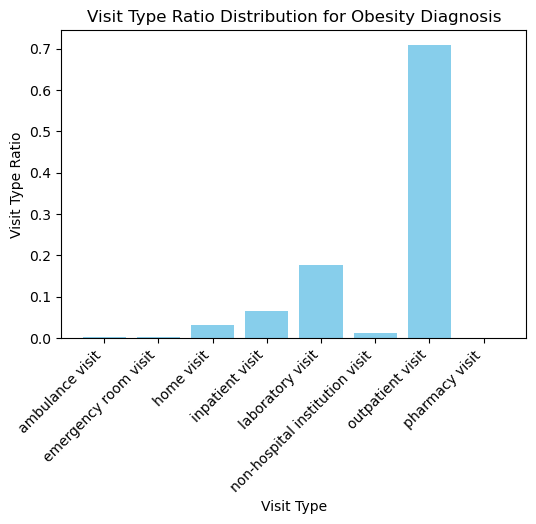

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(patients_visit_type_cnt['visit_type'], patients_visit_type_cnt['visit_type_ratio'], color='skyblue')
plt.xlabel('Visit Type')
plt.ylabel('Visit Type Ratio')
plt.title('Visit Type Ratio Distribution for Obesity Diagnosis')
plt.xticks(rotation=45, ha='right')  # Rotate labels to avoid overlap

# Show plot
plt.show()

- for obesity, outpatient visit is 0.709278

In [ ]:
patients_payor_channel_cnt = df_obesity.groupby(['diag', 'payor_channel'])['journey_id'].nunique().reset_index(name = 'count')
total_cnt = patients_payor_channel_cnt.groupby('diag')['count'].transform('sum')
patients_payor_channel_cnt['payor_channel_ratio'] = patients_payor_channel_cnt['count']/total_cnt
patients_payor_channel_cnt

diag       payor_channel  count  payor_channel_ratio
0  Obesity          commercial   6677             0.583756
1  Obesity    managed medicaid   2263             0.197849
2  Obesity            medicaid    111             0.009704
3  Obesity            medicare   1155             0.100979
4  Obesity  medicare advantage   1198             0.104739
5  Obesity             tricare     24             0.002098
6  Obesity    veterans affairs     10             0.000874

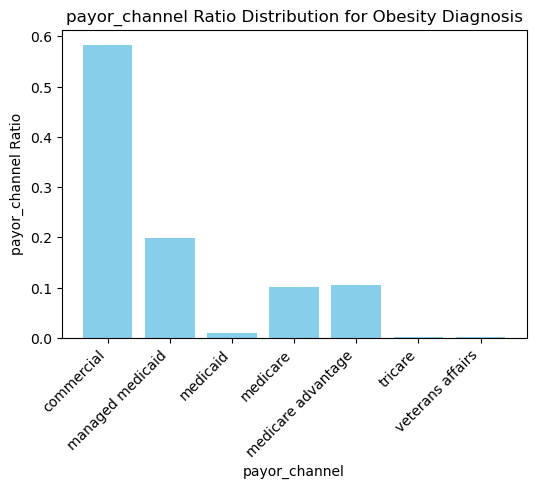

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(patients_payor_channel_cnt['payor_channel'], patients_payor_channel_cnt['payor_channel_ratio'], color='skyblue')
plt.xlabel('payor_channel')
plt.ylabel('payor_channel Ratio')
plt.title('payor_channel Ratio Distribution for Obesity Diagnosis')
plt.xticks(rotation=45, ha='right')  # Rotate labels to avoid overlap

# Show plot
plt.show()

##  Hypertensive analysis

In [ ]:
df_hypertensive = data1[data1['diag_1'].str.startswith("I10")|
      data1['diag_2'].str.startswith("I10")|
      data1['diag_3'].str.startswith("I10")|
      data1['diag_4'].str.startswith("I10")|
      data1['diag_5'].str.startswith("I10")]

In [ ]:
df_hypertensive['diag'] = "df_hypertensive"

In [ ]:
patients_gender_cnt = df_hypertensive.groupby(['diag', 'patient_gender'])['journey_id'].nunique().reset_index(name = 'count')
total_cnt = patients_gender_cnt.groupby('diag')['count'].transform('sum')
patients_gender_cnt['gender_ratio'] = patients_gender_cnt['count']/total_cnt
patients_gender_cnt

diag patient_gender  count  gender_ratio
0  df_hypertensive              F  10226      0.567386
1  df_hypertensive              M   7797      0.432614

### - 57% of hypertensive are female, 43% are male

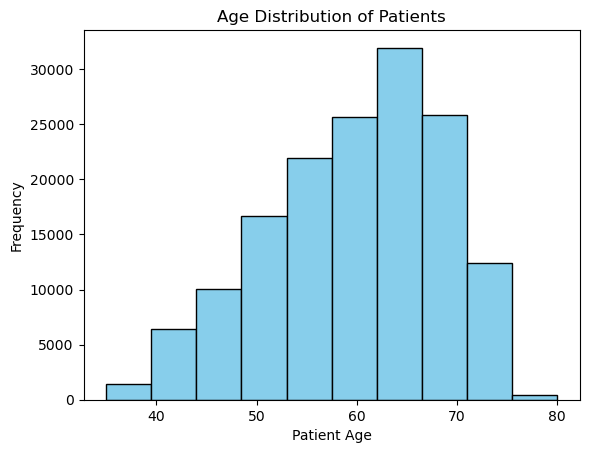

In [ ]:
# Age distribution of patients
plt.hist(df_hypertensive['patient_age'], bins=10, color='skyblue', edgecolor='black')

plt.xlabel('Patient Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Patients')

# Show the histogram
plt.show()

### -Age distribution for df_hypertensive patients are normally distributed and it is focused on the age of 60~65

## Ozempic claim analysis by year for obesity and hypertensive

(array([18.,  0., 20.,  0.,  0.,  0.,  0., 17.,  0., 19.]),
 array([2019. , 2019.4, 2019.8, 2020.2, 2020.6, 2021. , 2021.4, 2021.8,
        2022.2, 2022.6, 2023. ]),
 <BarContainer object of 10 artists>)

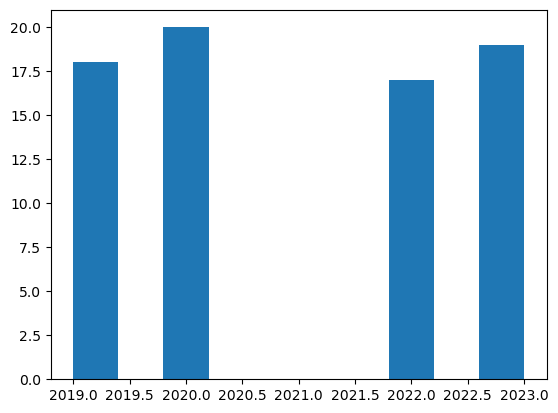

In [ ]:
# hypertensive histogram for ozm cliam date
df_obesity_ozm= df_obesity[df_obesity['proc_code']=="J3490"]

plt.hist(pd.to_datetime(df_obesity_ozm['claim_date']).dt.year)

(array([53.,  0., 71.,  0.,  0.,  0.,  0., 58.,  0., 58.]),
 array([2019. , 2019.4, 2019.8, 2020.2, 2020.6, 2021. , 2021.4, 2021.8,
        2022.2, 2022.6, 2023. ]),
 <BarContainer object of 10 artists>)

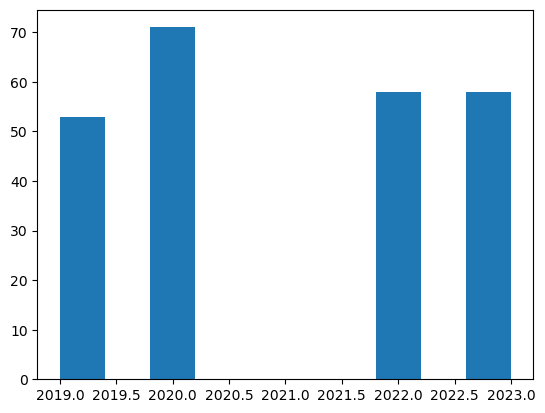

In [ ]:
# hypertensive histogram for ozm cliam date
df_hypertensive_ozm= df_hypertensive[df_hypertensive['proc_code']=="J3490"]

plt.hist(pd.to_datetime(df_hypertensive_ozm['claim_date']).dt.year)

### - For both Obesity and hypertensive, ozm claim increased in 2022 but it went down again in 2022

## Corrleation

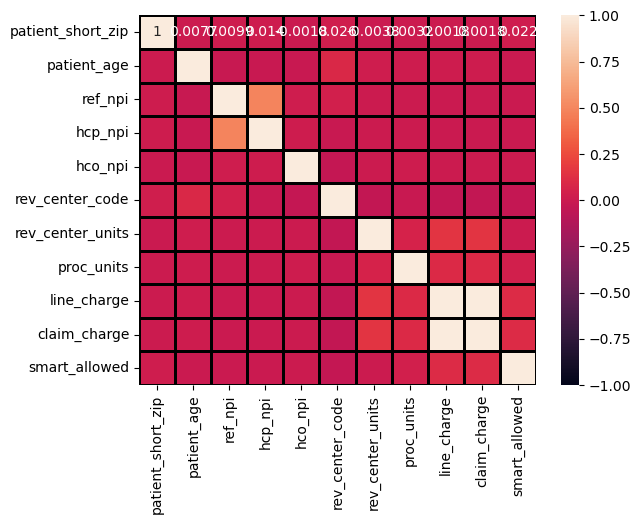

In [ ]:
# Corrleation

numeric_df = data1.select_dtypes(include=[np.number])
correlation = sns.heatmap(numeric_df.corr(), vmin=-1, vmax=1, annot=True, linewidths=1, linecolor='black')

#### - Insight of Correlations

- There are not many high correlation, no multicollinearity exist, except line_charge and claim charge are perfectly correlated, so I will drop one of them

## 2. Data Preprocessing and Merging

##### Prepare the datasets for analysis by handling missing data, encoding categorical variables, and any other necessary preprocessing steps. Merge the Medical and Prescription datasets appropriately, ensuring a coherent structure for further analysis.

- Step1: Select the useful columns in two datesets, specifically I choosed "journey_id", "visit_id", "claim_date", 'patient_state', "patient_short_zip", 'patient_age', 'patient_gender', 'diag_list' 'diag_1', 'diag_2', 'diag_3', 'diag_4', 'diag_5' in medical dataset, 'journey_id', 'claim_id', 'patient_gender', 'patient_state', 'patient_zip', 'ndc11', 'ndc', 'active' in prescription dataset. Clean the data including deleting useless columns, removing missing values and outliers.

In [ ]:
#Filter the columns that are needed for analysis
df_1 = data1[["journey_id", "visit_id", "claim_date", 'patient_state', "patient_short_zip", 'patient_age', 'patient_gender', 'diag_list', 'diag_1', 'diag_2', 'diag_3', 'diag_4', 'diag_5']]
df_2 = data2[['journey_id', 'claim_id', 'patient_gender', 'patient_state', 'patient_zip', 'ndc11', 'ndc', 'active']]

In [ ]:
# Check the basic information
df_1.head()

journey_id  \
0  00006390c96ebfffed580074c35a16a7   
1  00006390c96ebfffed580074c35a16a7   
2  00006390c96ebfffed580074c35a16a7   
3  00006390c96ebfffed580074c35a16a7   
4  00006d564a4718c744f1bbf1b6c5f8c3   

                                            visit_id  claim_date  \
0  f22b7ab885c44afae5449d74f8498f53aea1b2cfa79598...  2020-07-13   
1  f22b7ab885c44afae5449d74f8498f53aea1b2cfa79598...  2020-07-13   
2  3f45ba8ebef02b0c09b09e864e57ba5ee9d6bc9acf1c39...  2023-07-19   
3  3f45ba8ebef02b0c09b09e864e57ba5ee9d6bc9acf1c39...  2023-07-19   
4  9e4534892128401c693a6ab2ea758cd6a0a6484972168b...  2023-08-11   

  patient_state  patient_short_zip  patient_age patient_gender  \
0            CA              922.0         55.0              M   
1            CA              922.0         55.0              M   
2            CA              922.0         60.0              M   
3            CA              922.0         60.0              M   
4            CA              900.0         55.0              F   

                                       diag_list diag_1 diag_2 diag_3  diag_4  \
0                                           I872   I872    NaN    NaN     NaN   
1                                           I872   I872    NaN    NaN     NaN   
2  I5020,I480,I872,L03115,L03116,M179,R7303,Z712  I5020   I480   I872  L03115   
3  I5020,I480,I872,L03115,L03116,M179,R7303,Z712  I5020   I480   I872  L03115   
4                                           N200   N200    NaN    NaN     NaN   

   diag_5  
0     NaN  
1     NaN  
2  L03116  
3  L03116  
4     NaN

In [ ]:
df_2.head()

journey_id  \
0  00006390c96ebfffed580074c35a16a7   
1  00006390c96ebfffed580074c35a16a7   
2  00006390c96ebfffed580074c35a16a7   
3  00006390c96ebfffed580074c35a16a7   
4  00006390c96ebfffed580074c35a16a7   

                                            claim_id patient_gender  \
0  60618bd8d37311da702bf9349e76f8c26d515c082e136f...              M   
1  dbeb47defd161331e43f4e359e8d43e4ef7546ff58359b...              M   
2  02927d081fad10afffcba79bad27f94ff52c98e968aaec...              M   
3  a412c986e2503a5140ed1482e88b5ec50feeedaf2d89ec...              M   
4  b65634edd78998753fe9606b142b2fff7765d6c576973c...              M   

  patient_state  patient_zip        ndc11          ndc  active  
0            CA        922.0  47335067381  47335067381    True  
1            CA        922.0  47335067381  47335067381    True  
2            CA        922.0  47335067381  47335067381    True  
3            CA        922.0  47335067381  47335067381    True  
4            CA        922.0  65862059805  65862059805    True

In [ ]:
# data cleaning: Cleaning the missing values
cols_to_drop=[]
def display_missing_perc(df):
    for col in df.columns.tolist():
        missing_value = 100*(df[col].isnull().sum()/len(df[col]))
        print(f'{col} column missing values: {missing_value}')
        if missing_value >= 40:
            cols_to_drop.append(col)
    print('\n')
display_missing_perc(df_1)
display_missing_perc(df_2)


journey_id column missing values: 0.0
visit_id column missing values: 0.30070967483260497
claim_date column missing values: 0.0
patient_state column missing values: 0.0
patient_short_zip column missing values: 0.0020849204121727275
patient_age column missing values: 1.0496772382823463
patient_gender column missing values: 0.02116996110821539
diag_list column missing values: 0.1395292891223287
diag_1 column missing values: 0.1395292891223287
diag_2 column missing values: 26.13046790425404
diag_3 column missing values: 41.41630247383826
diag_4 column missing values: 52.16984082434546
diag_5 column missing values: 67.11984282907663


journey_id column missing values: 0.0
claim_id column missing values: 0.0
patient_gender column missing values: 0.0
patient_state column missing values: 0.0
patient_zip column missing values: 0.013637029229071911
ndc11 column missing values: 0.0
ndc column missing values: 0.0
active column missing values: 0.0




In [ ]:
## Fill missing values with mean
df_1['patient_age'] = df_1['patient_age'].fillna(df_1['patient_age'].mean())

## Fill missing values with 0
for col in ('diag_list', 'diag_1', 'diag_2', 'diag_3', 'diag_4', 'diag_5'):
    df_1[col] = df_1[col].fillna(0)

## Drop rows with the data contains missing values
df_1 = df_1.dropna(subset = ['visit_id', 'patient_short_zip','patient_gender', 'diag_list'])
df_2 = df_2.dropna(subset = ['patient_zip'])

In [ ]:
# Check the results
cols_to_drop=[]
def display_missing_perc(df):
    for col in df.columns.tolist():
        missing_value = 100*(df[col].isnull().sum()/len(df[col]))
        print(f'{col} column missing values: {missing_value}')
        if missing_value >= 40:
            cols_to_drop.append(col)
    print('\n')
display_missing_perc(df_1)
display_missing_perc(df_2)

journey_id column missing values: 0.0
visit_id column missing values: 0.0
claim_date column missing values: 0.0
patient_state column missing values: 0.0
patient_short_zip column missing values: 0.0
patient_age column missing values: 0.0
patient_gender column missing values: 0.0
diag_list column missing values: 0.0
diag_1 column missing values: 0.0
diag_2 column missing values: 0.0
diag_3 column missing values: 0.0
diag_4 column missing values: 0.0
diag_5 column missing values: 0.0


journey_id column missing values: 0.0
claim_id column missing values: 0.0
patient_gender column missing values: 0.0
patient_state column missing values: 0.0
patient_zip column missing values: 0.0
ndc11 column missing values: 0.0
ndc column missing values: 0.0
active column missing values: 0.0




In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 621506 entries, 0 to 623524
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   journey_id         621506 non-null  object 
 1   visit_id           621506 non-null  object 
 2   claim_date         621506 non-null  object 
 3   patient_state      621506 non-null  object 
 4   patient_short_zip  621506 non-null  float64
 5   patient_age        621506 non-null  float64
 6   patient_gender     621506 non-null  object 
 7   diag_list          621506 non-null  object 
 8   diag_1             621506 non-null  object 
 9   diag_2             621506 non-null  object 
 10  diag_3             621506 non-null  object 
 11  diag_4             621506 non-null  object 
 12  diag_5             621506 non-null  object 
dtypes: float64(2), object(11)
memory usage: 66.4+ MB


In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 894501 entries, 0 to 894622
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   journey_id      894501 non-null  object 
 1   claim_id        894501 non-null  object 
 2   patient_gender  894501 non-null  object 
 3   patient_state   894501 non-null  object 
 4   patient_zip     894501 non-null  float64
 5   ndc11           894501 non-null  int64  
 6   ndc             894501 non-null  int64  
 7   active          894501 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(4)
memory usage: 55.4+ MB


- Step2: The categorical variables are encoded to transfer into indicators as independent variable(or feature variables), specifically, I chose to encode columns of "patient_state" and "patient_gender' using LabelEncoder, and for diag_list, use strategy of labeling rows contain E66 with 1, I10 with 2, both with 3, others with 0. As for diag_1 to diag_5, use strategy that if the first 3 digits is E66 then labels 1, I10 then labels 2, others labels 0.

In [ ]:
df_1 = df_1.drop_duplicates()

In [ ]:
# Encode categorical variables
# Use LabelEncoder encode the categorial features
# Convert object datatypes into int datatypes
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Duplicate dataframe1
df_1_dummy = df_1.loc[:]

# Initialize the LabelEncoders
le_state = LabelEncoder()
le_gender = LabelEncoder()

# Fit and transform the data
df_1_dummy['patient_state'] = le_state.fit_transform(df_1_dummy['patient_state'])
df_1_dummy['patient_gender'] = le_gender.fit_transform(df_1_dummy['patient_gender'])


# Function for diag_list, diagnose list contain E66 then labels 1, I10 labels 2, both labels 3, others labels 0
def label_diag_list(value):
    # Ensure the value is treated as a string, even if it's not
    value_str = str(value)

    # Split the string by commas to work with each code separately
    codes = value_str.split(',')

    # Initialize flags to check the presence of codes starting with "E66" or "I10"
    has_e66 = any(code.startswith('E66') for code in codes)
    has_i10 = any(code.startswith('I10') for code in codes)

    if has_e66 and has_i10:
        return 3
    elif has_e66:
        return 1
    elif has_i10:
        return 2
    else:
        return 0

# Function for diag_1 to diag_5, if the first 3 digits is E66 then labels 1, I10 then labels 2, others labels 0
def label_diag_codes(value):
    value_str = str(value)
    if value_str.startswith('E66'):
        return 1
    elif value_str.startswith('I10'):
        return 2
    else:
        return 0

# Apply the functions
df_1_dummy['diag_list'] = df_1_dummy['diag_list'].apply(label_diag_list)

for col in ['diag_1', 'diag_2', 'diag_3', 'diag_4', 'diag_5']:
    df_1_dummy[col] = df_1_dummy[col].apply(label_diag_codes)

# Check the count of patients diagnoses
patients_diaglist_cnt = df_1_dummy.groupby(['diag_list'])['journey_id'].nunique().reset_index(name = 'count')
patients_diaglist_cnt

diag_list  count
0          0  24850
1          1   5629
2          2  15410
3          3  10045

In [ ]:
# Print the result
df_1_dummy

journey_id  \
0       00006390c96ebfffed580074c35a16a7   
2       00006390c96ebfffed580074c35a16a7   
4       00006d564a4718c744f1bbf1b6c5f8c3   
5       00006d564a4718c744f1bbf1b6c5f8c3   
6       00006d564a4718c744f1bbf1b6c5f8c3   
...                                  ...   
623514  1fff36b69093f3ece1c2426183acaf31   
623519  1fffbb8b7e6a6c38cf97dafe3c5bc1cc   
623520  1fffbb8b7e6a6c38cf97dafe3c5bc1cc   
623521  1fffbb8b7e6a6c38cf97dafe3c5bc1cc   
623524  1fffcb3288827e67d70ac1f368f050f8   

                                                 visit_id  claim_date  \
0       f22b7ab885c44afae5449d74f8498f53aea1b2cfa79598...  2020-07-13   
2       3f45ba8ebef02b0c09b09e864e57ba5ee9d6bc9acf1c39...  2023-07-19   
4       9e4534892128401c693a6ab2ea758cd6a0a6484972168b...  2023-08-11   
5       3b0f0f71ac05c34ab9307c4853f1af59420c07b522cdf2...  2019-11-01   
6       b058872fef09e56b8cb2884d0efb176b40d74e0ab9958f...  2022-09-16   
...                                                   ...         ...   
623514  90dd0d3877657977e96b0cdde071e0505e4c5b02dd00d3...  2019-09-27   
623519  ba833179534383630f17e56f323a9a385c5d07662f4766...  2022-07-01   
623520  c45c2ba5fa8c97f5dd9e39064496898a54e7c82624ac9e...  2023-01-04   
623521  a6cd72b2886f6ca2214157a2771350882833506a015485...  2019-05-21   
623524  b9f23c864b1b11ca1e16706536d7ec6d316a13280a5dc3...  2022-05-25   

        patient_state  patient_short_zip  patient_age  patient_gender  \
0                   4              922.0         55.0               1   
2                   4              922.0         60.0               1   
4                   4              900.0         55.0               0   
5                   4              900.0         50.0               0   
6                   4              900.0         50.0               0   
...               ...                ...          ...             ...   
623514              4              910.0         65.0               0   
623519              4              922.0         45.0               1   
623520              4              922.0         50.0               1   
623521              4              922.0         45.0               1   
623524              4              921.0         65.0               1   

        diag_list  diag_1  diag_2  diag_3  diag_4  diag_5  
0               0       0       0       0       0       0  
2               0       0       0       0       0       0  
4               0       0       0       0       0       0  
5               0       0       0       0       0       0  
6               2       0       0       2       0       0  
...           ...     ...     ...     ...     ...     ...  
623514          0       0       0       0       0       0  
623519          2       2       0       0       0       0  
623520          0       0       0       0       0       0  
623521          0       0       0       0       0       0  
623524          3       0       0       2       0       0  

[274339 rows x 13 columns]

- Step3: Merge two datasets using strategy of generating a new column in the medical dataset based on whether each journey_id exists in the selected prescription dataset set, the selected prescription dataset contrains data of patients who received Ozempic (ndc is in ndc-list).

In [ ]:
df_2.drop_duplicates()
df_2 = df_2[df_2['active']][df_2['ndc'].isin(ndc_list)]

# Get the integer locations of columns 'journey_id' and 'ndc'
col_indices = [df_2.columns.get_loc('journey_id'), df_2.columns.get_loc('ndc')]

# Use iloc to select columns 'journey_id' and 'ndc' by their indices
df_2_selected = df_2.iloc[:, col_indices]

In [ ]:
df_2_selected

journey_id        ndc
500     0003ff8dd03803a9197ed01075f4b094  169418113
501     0003ff8dd03803a9197ed01075f4b094  169418113
502     0003ff8dd03803a9197ed01075f4b094  169418113
503     0003ff8dd03803a9197ed01075f4b094  169418113
1034    00056d978dce9b6f87ee68765b0f5cb2  169413212
...                                  ...        ...
894102  1ff8ff0a9c69c0d70e83a2061727c792  169413013
894107  1ff8ff0a9c69c0d70e83a2061727c792  169413013
894112  1ff8ff0a9c69c0d70e83a2061727c792  169413013
894607  1fff19f39322d5c25a60259f30d937a4  169413013
894608  1fff19f39322d5c25a60259f30d937a4  169413013

[10740 rows x 2 columns]

In [ ]:
# Create a set of unique journey_ids from the selected prescription dataset
unique_id = set(df_2_selected['journey_id'].unique())

# Generate a new column in the medical dataset based on whether each journey_id exists in the selected prescription dataset set
df_1_dummy['ndc = 1'] = df_1_dummy['journey_id'].apply(lambda x: 1 if x in unique_id else 0)

# Check the number of patient who recieved Ozempic or not
cnt = df_1_dummy.groupby(['ndc = 1'])['journey_id'].nunique().reset_index(name = 'count')
cnt

ndc = 1  count
0        0  26266
1        1   1011

In [ ]:
# Print the merged dataframe result
df_1_dummy

journey_id  \
0       00006390c96ebfffed580074c35a16a7   
2       00006390c96ebfffed580074c35a16a7   
4       00006d564a4718c744f1bbf1b6c5f8c3   
5       00006d564a4718c744f1bbf1b6c5f8c3   
6       00006d564a4718c744f1bbf1b6c5f8c3   
...                                  ...   
623514  1fff36b69093f3ece1c2426183acaf31   
623519  1fffbb8b7e6a6c38cf97dafe3c5bc1cc   
623520  1fffbb8b7e6a6c38cf97dafe3c5bc1cc   
623521  1fffbb8b7e6a6c38cf97dafe3c5bc1cc   
623524  1fffcb3288827e67d70ac1f368f050f8   

                                                 visit_id  claim_date  \
0       f22b7ab885c44afae5449d74f8498f53aea1b2cfa79598...  2020-07-13   
2       3f45ba8ebef02b0c09b09e864e57ba5ee9d6bc9acf1c39...  2023-07-19   
4       9e4534892128401c693a6ab2ea758cd6a0a6484972168b...  2023-08-11   
5       3b0f0f71ac05c34ab9307c4853f1af59420c07b522cdf2...  2019-11-01   
6       b058872fef09e56b8cb2884d0efb176b40d74e0ab9958f...  2022-09-16   
...                                                   ...         ...   
623514  90dd0d3877657977e96b0cdde071e0505e4c5b02dd00d3...  2019-09-27   
623519  ba833179534383630f17e56f323a9a385c5d07662f4766...  2022-07-01   
623520  c45c2ba5fa8c97f5dd9e39064496898a54e7c82624ac9e...  2023-01-04   
623521  a6cd72b2886f6ca2214157a2771350882833506a015485...  2019-05-21   
623524  b9f23c864b1b11ca1e16706536d7ec6d316a13280a5dc3...  2022-05-25   

        patient_state  patient_short_zip  patient_age  patient_gender  \
0                   4              922.0         55.0               1   
2                   4              922.0         60.0               1   
4                   4              900.0         55.0               0   
5                   4              900.0         50.0               0   
6                   4              900.0         50.0               0   
...               ...                ...          ...             ...   
623514              4              910.0         65.0               0   
623519              4              922.0         45.0               1   
623520              4              922.0         50.0               1   
623521              4              922.0         45.0               1   
623524              4              921.0         65.0               1   

        diag_list  diag_1  diag_2  diag_3  diag_4  diag_5  ndc = 1  
0               0       0       0       0       0       0        0  
2               0       0       0       0       0       0        0  
4               0       0       0       0       0       0        0  
5               0       0       0       0       0       0        0  
6               2       0       0       2       0       0        0  
...           ...     ...     ...     ...     ...     ...      ...  
623514          0       0       0       0       0       0        0  
623519          2       2       0       0       0       0        0  
623520          0       0       0       0       0       0        0  
623521          0       0       0       0       0       0        0  
623524          3       0       0       2       0       0        0  

[274339 rows x 14 columns]

## 3. Causal Analysis Setup

##### Discuss the potential endogeneity issues in estimating the treatment effect of Ozempic on the target population. Outline your strategy for addressing endogeneity, referencing the big-picture problem of causality and treatment effect estimation discussed in class.


(1) Potential endogeneity issues:

    Omitted Variable Bias: There might be unobserved factors like lifestyle, diet, genetics that influence both the likelihood of being prescribed Ozempic and the health outcomes of interest. Failing to control for these factors can bias the estimated effect of Ozempic.

    Measurement Error: If there are errors in measuring the treatment variable like inaccuracies in reported adherence to Ozempic, this can lead to endogeneity.

    Self-Selection: Individuals might self-select into treatment based on their anticipated benefits from the medication, which could be correlated with unobserved characteristics that also affect health outcomes.

(2) Strategy:

    Using Instrumental Variables (IV) tool:
    
    Identify an instrument that affects the likelihood of being treated with Ozempic but has no direct effect on the outcome except through the treatment. This instrument can be used to isolate the exogenous variation in treatment assignment.
    
    In this case I used geographic variation (patient_state or patient_short_zip) in the prescription patterns of healthcare providers e as an instrument, because these patterns do not directly affect patient outcomes.

## 4. Model Development: Double-Lasso / Treatment Effect Lasso

##### Implement the double-lasso technique to estimate the treatment effect of Ozempic, considering the endogeneity of treatment assignment. Justify the inclusion of variables in your model, explaining the rationale behind each decision.

In the diag_list column where values are equal to 1,2,3 (patients are diagnosed of obesity and hypertension), if the diag_1 is 0 then labels as 1 for being effected (diag_1 is priamary diagnose), other labels as 0 as outcome variable, then I chose 'ndc = 1' column as treatment effect (d), 'patient_age' and 'patient_gender' as confounders, while 'patient_state' as IV variable.

In [ ]:
# Filter the patients who are diagnosed as obesity or hypertension or both
diagnose = df_1_dummy[df_1_dummy['diag_list'] != 0]
diagnose = diagnose.drop_duplicates(subset=['journey_id'], keep='last')

scaler = StandardScaler()

# Normalize the age and zip code columns
diagnose['patient_age'] = scaler.fit_transform(diagnose[['patient_age']])
diagnose['patient_short_zip'] = scaler.fit_transform(diagnose[['patient_short_zip']])

# Generate new column as 'cured' (outcome variable) to store the final diagnose results (diag_1 = 0 labels as 1, else labels as 0)
diagnose['Cured'] = diagnose['diag_1'].apply(lambda x: 1 if x == 0 else 0)

# Check the number of patient who recieved Ozempic or not and whether they have received Ozempic
patient_cnt = diagnose.groupby(['diag_list', 'Cured', 'ndc = 1'])['journey_id'].nunique().reset_index(name = 'count')
patient_cnt

diag_list  Cured  ndc = 1  count
0           1      0        0    399
1           1      0        1     20
2           1      1        0   2332
3           1      1        1    104
4           2      0        0   3383
5           2      0        1     97
6           2      1        0   8022
7           2      1        1    386
8           3      0        0   1475
9           3      0        1     28
10          3      1        0   3636
11          3      1        1    102

In [ ]:
# Print the results
diagnose

journey_id  \
17      00006d564a4718c744f1bbf1b6c5f8c3   
22      000072bc05e31d0126475c7a3e771af1   
66      00011020325337a2a22fb26b6492196a   
82      00012bb21b3136f52c1c0774071f2ec2   
91      00025243850b83969606f3f2aafc2d99   
...                                  ...   
623294  1ffdeeeb07ed99dca9658298d836e301   
623304  1ffe48236d1f1abe1446b4fa382ca250   
623492  1fff36b69093f3ece1c2426183acaf31   
623519  1fffbb8b7e6a6c38cf97dafe3c5bc1cc   
623524  1fffcb3288827e67d70ac1f368f050f8   

                                                 visit_id  claim_date  \
17      368b19e52d3454a41b86933b9fbfcf8a757c3993196605...  2019-11-01   
22      8b53ffacbf985d68cbf2aa8e6a9e63a3662c4eddfef1d5...  2023-02-03   
66      6e4c18cd2cbaa8810c085e566603a7f22fad56d721079d...  2022-12-23   
82      21235d1d7c982b0224b7e17b61d950b365565c0e8ed20f...  2023-01-20   
91      6b7c9e01419fcd1fba69c3f1a44b5d9e81967db789bf21...  2022-07-21   
...                                                   ...         ...   
623294  3f4a070bf44a88bcc196303f0741d9d9605d3ef483b43b...  2023-03-20   
623304  65e8839f965878937549796be42e62eee4e9362f8f3b96...  2022-09-21   
623492  c8e877ce0f8486cb88d897680d1842c15da373f78d98eb...  2020-12-19   
623519  ba833179534383630f17e56f323a9a385c5d07662f4766...  2022-07-01   
623524  b9f23c864b1b11ca1e16706536d7ec6d316a13280a5dc3...  2022-05-25   

        patient_state  patient_short_zip  patient_age  patient_gender  \
17                  4          -0.209459    -0.898133               0   
22                  4           0.368786    -0.394819               1   
66                  4           0.396321     1.115123               1   
82                  4           0.065896    -0.898133               1   
91                  4           0.065896     1.115123               0   
...               ...                ...          ...             ...   
623294              4           0.396321     0.611809               1   
623304              4           0.148502     0.611809               1   
623492              4           0.065896     0.611809               0   
623519              4           0.396321    -1.401447               1   
623524              4           0.368786     0.611809               1   

        diag_list  diag_1  diag_2  diag_3  diag_4  diag_5  ndc = 1  Cured  
17              2       0       0       2       0       0        0      1  
22              3       0       1       0       0       0        0      1  
66              2       0       0       0       0       2        0      1  
82              2       0       2       0       0       0        0      1  
91              3       2       1       0       0       0        0      0  
...           ...     ...     ...     ...     ...     ...      ...    ...  
623294          3       2       1       0       0       0        0      0  
623304          1       0       0       1       0       0        0      1  
623492          2       0       2       0       0       0        0      1  
623519          2       2       0       0       0       0        0      0  
623524          3       0       0       2       0       0        0      1  

[19984 rows x 15 columns]

- Use the patial lasson regression to examine the treatment effect

In [ ]:
import numpy as np

class SelectiveRegularizationLinearRegression:
    def __init__(self, alpha, apply_penalty, tolerance=1e-4, max_iterations=1000):
        self.alpha = alpha
        self.tolerance = tolerance
        self.apply_penalty = apply_penalty
        self.max_iterations = max_iterations
        self.w = None

    def _predicted_values(self, X, w):
        return np.matmul(X, w)

    def _rho_compute(self, y, X, w, j):
        X_k = np.delete(X, j, 1)
        w_k = np.delete(w, j)
        predict_k = self._predicted_values(X_k, w_k)
        residual = y - predict_k
        rho_j = np.sum(X[:, j] * residual)
        return rho_j

    def _z_compute(self, X):
        return np.sum(X * X, axis=0)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        if not self.w:
            self.w = np.zeros(n_features)
        z = self._z_compute(X)
        for iteration in range(self.max_iterations):
            max_step = 0
            for j in range(n_features):
                rho_j = self._rho_compute(y, X, self.w, j)
                w_j_old = self.w[j]
                if j == 0:
                    self.w[j] = rho_j / z[j]
                else:
                    if self.apply_penalty[j]:
                        if rho_j < -self.alpha * n_samples:
                            self.w[j] = (rho_j + self.alpha * n_samples) / z[j]
                        elif -self.alpha * n_samples <= rho_j <= self.alpha * n_samples:
                            self.w[j] = 0.
                        elif rho_j > self.alpha * n_samples:
                            self.w[j] = (rho_j - self.alpha * n_samples) / z[j]
                    else:
                        self.w[j] = rho_j / z[j]
                max_step = max(max_step, abs(self.w[j] - w_j_old))
            if max_step < self.tolerance:
                break
        return self

    def predict(self, X):
        if self.w is None:
            raise ValueError("Model is not fitted yet!")
        return self._predicted_values(X, self.w)

In [ ]:
# Split the dataset into dependent variables and target variable
X = diagnose[['patient_age', 'patient_gender', 'patient_state', 'ndc = 1'] + [col for col in diagnose.columns if 'diag_' in col and col != 'diag_1']]
X = sm.add_constant(X)

n_samples = len(X)

X = np.hstack((np.ones((n_samples, 1)), X))
y = diagnose['Cured'].values

In [ ]:
# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 50)

In [ ]:
apply_penalty = np.array([False, False, False, False, True , False, False, False, False, False, False, False]) #apply a penalty term to the last 2 coefficients
alpha = 0.1 # L1 penalty term
max_iterations = 1000 # Optional, determines how long the model will look for an l1 penalty

model = SelectiveRegularizationLinearRegression(alpha, apply_penalty, max_iterations)
model.fit(X_train, y_train)

In [ ]:
print("Learned coefficients:", model.w) # print out model coefficients

Learned coefficients: [ 7.30218302e-01 -4.64450590e-17  1.48106287e-02 -8.09097808e-04
  0.00000000e+00  6.31753270e-02 -5.33826925e-03  1.04329016e-01
  1.10865277e-01  1.10578099e-01  1.03020084e-01]


## 5. Model Evaluation and Interpretation

##### Evaluate the performance of your model, discussing the implications of your findings. Interpret the estimated treatment effects, providing insights into the impact of Ozempic on the target patient population.

In [ ]:
# Evaluate the model based on R Square and MSE
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R^2:", r2)

MSE: 0.16884814444501492
R^2: 0.14819083820357537


In [ ]:
# Split the data into a new training and test 80-20.
X_n = diagnose.drop(['journey_id', 'visit_id', 'diag_1', 'claim_date', 'Cured', 'patient_short_zip'], axis=1)
y_n = diagnose['Cured']

X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, y_n, train_size=0.8, random_state=50)

In [ ]:
# Assuming X_train_n and y_train_n are pandas DataFrames
X_train_n = X_train_n.reset_index(drop=True)
y_train_n = y_train_n.reset_index(drop=True)

In [ ]:
# Initialize list to store MSE and R^2 for each fold
mse_values = []
r2_values = []

K = 5
fold_size = len(X_train_n) // K

# Perform K-Fold Cross-Validation
for k in range(K):
    # Create indices for the test set
    test_indices = list(range(k * fold_size, min((k + 1) * fold_size, len(X_train_n))))

    # Split the data into training and testing sets using .iloc for Pandas DataFrames
    X_train_2 = X_train_n.drop(test_indices).values
    y_train_2 = y_train_n.drop(test_indices).values
    X_test_2 = X_train_n.iloc[test_indices].values
    y_test_2 = y_train_n.iloc[test_indices].values

    # Initialize and train the model
    model = SelectiveRegularizationLinearRegression(alpha, apply_penalty, max_iterations)
    model.fit(X_train_2, y_train_2)

    # Make predictions and evaluate the model
    predictions = model.predict(X_test_2)
    mse = mean_squared_error(y_test_2, predictions)
    r2 = r2_score(y_test_2, predictions)

    mse_values.append(mse)
    r2_values.append(r2)

# Print MSE and R^2 values for each fold
print("MSE:", mse_values)
print("R^2:", r2_values)

MSE: [0.17992407072129618, 0.17460754038605078, 0.16891614873344193, 0.17660195792839242, 0.18393713821847862]
R^2: [0.09423841313023351, 0.10272560429211686, 0.11424541427496127, 0.11159597341595462, 0.0893753758835445]


In [ ]:
# Calculate the average accuracy across all folds
average_MSE_l = np.mean(mse_values)
print("Average MSE of the linear regression model:", average_MSE_l)

Average MSE of the linear regression model: 0.176797371197532


In [ ]:
# Calculate the average R^2 across all folds
average_R2_l = np.mean(r2_values)
print("Average R^2 of the linear regression model:", average_R2_l)

Average R^2 of the linear regression model: 0.10243615619936215


- Insight:

(1) R^2: The value is 14.82%, CV average value is 10.24%, suggestiing that the model explains 14.582% of the variability in the binary outcome, which is not very high. This implies that other unaccounted-for factors are influencing whether a patient is diagnosed with obesity or hypertension on the first diagnosis.

(2) MSE: The value is 0.1693, CV average value is 0.177. The MSE here suggests that there is some level of error in the model's predictions.

This two criterias suggest that the treatment effect of Ozempic is not significant.

In [ ]:
from sklearn.metrics import  precision_score, f1_score, roc_auc_score, confusion_matrix

# Typically, a threshold of 0.5 is used for binary classification
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred]

# Calculating evalutation metrics
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

print(precision, f1, auc_roc)

0.7275456592444334 0.8422881969587256 0.5


- Insight:

(1) Accuracy: Approximately 72.75%, indicating that the model correctly predicted whether a patient can be detected as having obesity or hypertension in the first diagnosis about 72.75% of the time. It is a fairly good accuracy rate.

(2) Recall (F1 Score): The score is 0.842, which suggests a good balance between precision and recall. This means the model is robust in terms of both the precision and the ability to find all the relevant instances of the positive class.

(3) auc_roc: the value is 0.5 indicates that the model does no better than random chance at distinguishing between the positive and negative class.

Despite the high precision and F1 score, the AUC-ROC suggests that the model's overall ability to discriminate between the positive and negative classes across all thresholds is equivalently random, suggesting the model is heavily biased towards one class.

## 6. Additional Insights

##### Utilize the census and additional Ozempic information to enrich your analysis. This could involve integrating demographic factors from selected zip code prefixes to explore how they might influence treatment effects or reveal interesting patterns related to the use of Ozempic. If you prefer, you can incorporate these additional insights into your EDA section. Whether included in the EDA or as a separate section, the allocation of points will not be affected. Flexibility in Approach: This assignment is designed to encourage creative and critical thinking. You are free to explore the datasets from various angles and use any methods, functions, or packages you find appropriate for your analysis. The emphasis is on the quality of insights generated and the justification of your analytical choices, rather than adherence to a prescribed set of tools or techniques.

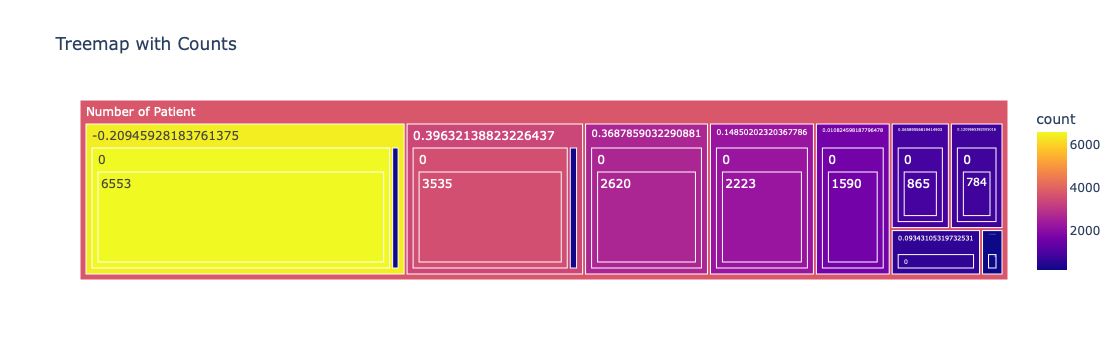

In [ ]:
Num_Patients = diagnose.groupby(['patient_short_zip', 'ndc = 1'], as_index=False)['journey_id'].nunique().sort_values('journey_id',ascending=False)
Num_Patients.rename(columns = {"journey_id" : "count"}, inplace = True)
Num_Patients_500 = Num_Patients[Num_Patients['count'] > 100]

fig = px.treemap(Num_Patients_500, path=[px.Constant('Number of Patient'), 'patient_short_zip', 'ndc = 1', 'count'],
                 values='count',
                 hover_data=['patient_short_zip'],
                 color='count',
                 color_discrete_sequence= px.colors.sequential.RdBu_r,
                 title = 'Treemap with Counts'
                )

fig.show()

The largest area is colored yellow, representing the diagnostic code 900.0, with the highest patient count of 6553. This indicates Los Angeles has the highest number of patients.  Higher patient counts in larger cities like Los Angeles could be reflective of both higher population density and a broader availability of healthcare services leading to more diagnoses being recorded. Comparatively high patient counts in smaller cities, like Indio, may signal specific health challenges or higher prevalence of certain conditions that warrant further investigation.

- Use logistic regression to predict Ozempic treatment effect based on the demographic and diagnosis information

In [ ]:
from sklearn.linear_model import LogisticRegression
# Normalize the age column
scaler = StandardScaler()
diagnose['patient_age'] = scaler.fit_transform(diagnose[['patient_age']])
diagnose['patient_short_zip'] = scaler.fit_transform(diagnose[['patient_short_zip']])

# Set up a model to predict the 'Cured' status based on the demographic and diagnosis information
X = diagnose[['patient_age', 'patient_gender', 'ndc = 1'] + [col for col in diagnose.columns if 'diag_' in col and col != 'diag_1']]
y = diagnose['Cured']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred_3 = model.predict(X_test)

# Evaluate the model
# Calculating evalutation metrics
precision = precision_score(y_test, y_pred_3)
f1 = f1_score(y_test, y_pred_3)
auc_roc = roc_auc_score(y_test, y_pred_3)
confusion_matrix = confusion_matrix(y_test, y_pred_3)

# Print the results
print (precision, f1, auc_roc)
print(confusion_matrix)

0.9299363057324841 0.9166376002790374 0.8609478554457922
[[ 891  198]
 [ 280 2628]]


- Insight

1. Precision: the value is 92.99%, which means when the model predicts that a patient is cured, it is correct about 92.99% of the time. This high precision suggests that the presence of the treatment is a strong predictor for a cured outcome in the predicted instances.

2. Recall (F1 Score): the value is 91.66%, suggesting the model is able to correctly identify 91.66% of the patients who are actually cured. High recall in the context of treatment effect suggests that Ozempic is effective for a large proportion of the patients.

3. AUC-ROC: the value is 86.09%, which means the model has a good ability to distinguish between patients who are cured and those who are not.

The logistic regression model shows strong performance across precision, recall, and AUC-ROC metrics. However, there is room for improvement, as indicated by the number of false positives and false negatives.

- Comparision:

Based on these metrics, the logistic regression model appears to be significantly more effective at predicting the outcome variable in this dataset compared to the double lasso regression model. However, the goal is the inference about the importance of specific variables (treatment effect), double lasso regression may still provide valuable insights despite its lower discriminative performance.

In [ ]:
# Filter the Data to include only rows where diag_1 starts with "I10" or "E66"
df_base = data1[data1['diag_1'].str.startswith("I10") | data1['diag_1'].str.startswith("E66")]

# Further filter df_base to include only rows with age between 40 and 75
df_base = df_base[(df_base['patient_age'] >= 40) & (df_base['patient_age'] <= 75)]

df_base.head()


journey_id                        episode_id  \
91   00025243850b83969606f3f2aafc2d99  67f4df54bf85e427589ed1cd425270f6   
201  0004094aa2ec57dd99b186ace5070625  1fc12255b88e07a93feb523819cba93c   
206  0004094aa2ec57dd99b186ace5070625  1fc12255b88e07a93feb523819cba93c   
207  0004094aa2ec57dd99b186ace5070625  1fc12255b88e07a93feb523819cba93c   
237  0004bed2670fd243392dc3a994da3f8a  ddd181f11bb36a27b920c61df51ca642   

                                              visit_id  \
91   6b7c9e01419fcd1fba69c3f1a44b5d9e81967db789bf21...   
201  1f5bccba82c4b0acb2e1cf8ad92e2c6a07cd8a9fa56c80...   
206  1f5bccba82c4b0acb2e1cf8ad92e2c6a07cd8a9fa56c80...   
207  1f5bccba82c4b0acb2e1cf8ad92e2c6a07cd8a9fa56c80...   
237  9e73758d2163af00d8005682f202cd6f6d339e9a692d78...   

                                          encounter_id  claim_date  \
91   2db3a06e836eb02dedad5f3982685cee7376282a619af5...  2022-07-21   
201  0259050a90196f1e191aee50a2981dc032e52626ba86f5...  2023-05-26   
206  0259050a90196f1e191aee50a2981dc032e52626ba86f5...  2023-05-26   
207  0259050a90196f1e191aee50a2981dc032e52626ba86f5...  2023-05-26   
237  39a76631c902efb924077e77aeda59f9af6b582444e5c0...  2022-08-29   

    patient_state  patient_short_zip  patient_age patient_gender  \
91             CA              910.0         70.0              F   
201            CA              900.0         65.0              M   
206            CA              900.0         65.0              M   
207            CA              900.0         65.0              M   
237            CA              911.0         50.0              M   

       place_of_service  ... diag_4 diag_5 rev_center_code  rev_center_units  \
91                  NaN  ...  Z7182    NaN             NaN               1.0   
201              Office  ...   E669  Z6830             NaN               1.0   
206              Office  ...   E669  Z6830             NaN               1.0   
207              Office  ...   E669  Z6830             NaN               1.0   
237  Independent Clinic  ...   E669  R7303             NaN               1.0   

     proc_code proc_modifier proc_units  line_charge claim_charge  \
91       99213            95        1.0       175.00       175.00   
201      3078F           NaN        1.0         0.01         0.01   
206      1159F           NaN        1.0         0.01         0.01   
207      3008F           NaN        1.0         0.01         0.01   
237      99204           NaN        1.0         0.00         0.00   

    smart_allowed  
91           0.00  
201         56.38  
206         44.68  
207         48.46  
237        129.72  

[5 rows x 34 columns]

In [ ]:
import pandas as pd

# Calculate cross-tabulation as percentages within each state
ct_percentage = pd.crosstab(df_base['patient_state'], df_base['payor_channel'], normalize='index') * 100
print(ct_percentage)

payor_channel  commercial  managed medicaid  medicaid   medicare  \
patient_state                                                      
AK              48.571429          2.857143  0.000000  48.571429   
AL              76.233184          0.448430  1.793722   2.242152   
AZ              37.500000         39.228723  1.861702   9.973404   
CA              54.218687         21.629783  2.348222  12.072385   

payor_channel  medicare advantage   tricare  veterans affairs  
patient_state                                                  
AK                       0.000000  0.000000          0.000000  
AL                      19.282511  0.000000          0.000000  
AZ                      10.106383  0.000000          1.329787  
CA                       9.573173  0.096904          0.060846  


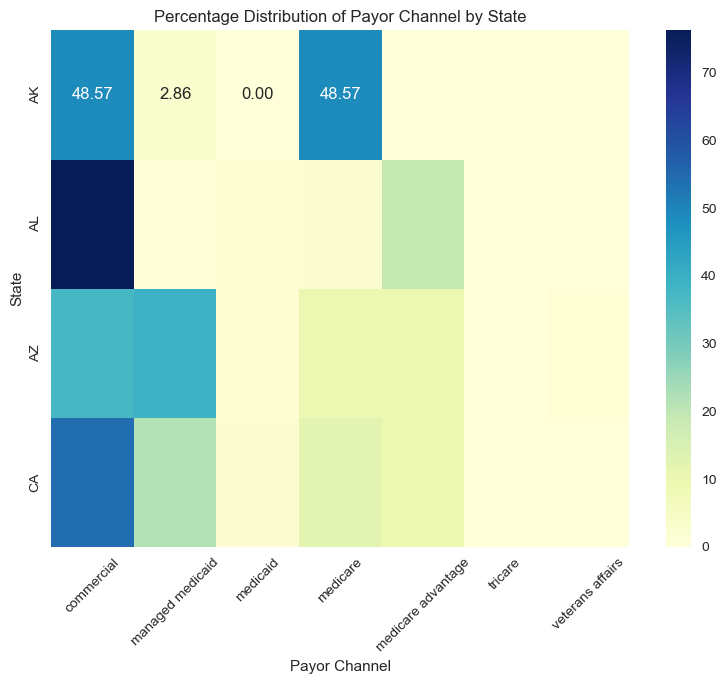

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the heatmap
plt.figure(figsize=(8, 7))  # Adjust the size as needed
sns.heatmap(ct_percentage, annot=True, cmap="YlGnBu", fmt=".2f")  # Formatting to show 2 decimal places
plt.title('Percentage Distribution of Payor Channel by State')
plt.ylabel('State')
plt.xlabel('Payor Channel')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

- When filtering the data for only individuals aged 40 to 75 with obesity and hypertension, although California (CA) has the highest number of users of Ozempic, the proportion of those using commercial payors is 54%. In contrast, Alabama (AL) has a 76% commercial payor proportion, indicating that a higher percentage of individuals in AL may pay for Ozempic without insurance coverage. Based on this, I can't say that I am confident enough that usage of ozempic is correlated with place/state/income/education level.

## 6. Model Development and evaluation: Random forest and classification

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Split the data into a new training and test 80-20.
X_n = diagnose.drop(['journey_id', 'visit_id', 'diag_1', 'claim_date', 'Cured', 'patient_short_zip'], axis=1)
y_n = diagnose['Cured']

X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, y_n, train_size=0.8, random_state=50)

#Train the randome forest model with np.random.seed(seed=5566)
np.random.seed(seed=5566)
model = RandomForestRegressor()
model.fit(X_train_n, y_train_n)

#Predict the test data
y_pred_test = model.predict(X_test_n)

# then compute MSE.
mse_test = mean_squared_error(y_test_n, y_pred_test)

print('MSE test:', mse_test)

MSE test: 0.0807874344508986


- Insights
MSE is 0.080 indicates this model is very well performing with random forest

In [ ]:
from sklearn import tree
# Split the data into a new training and test 80-20.
X_n = diagnose.drop(['journey_id', 'visit_id', 'diag_1', 'claim_date', 'Cured', 'patient_short_zip'], axis=1)
y_n = diagnose['Cured']

X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, y_n, train_size=0.8, random_state=50)

#build decision tree classifier
np.random.seed(seed=5566)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_n, y_train_n)
y_pred = clf.predict(X_test_n)

# compute accuracy.
accuracy = accuracy_score(y_test_n, y_pred)
print('Accuracy:', accuracy)

# compute mse
mse = mean_squared_error(y_test_n, y_pred)
print('MSE:', mse)

Accuracy: 0.8924193144858644
MSE: 0.1075806855141356


- Insights
accuracy is  89% and MSE is 0.107 indicates this model is very well performing with decision tree classification

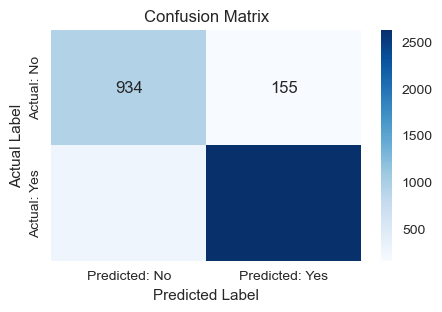

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix_values = confusion_matrix(y_test_n, y_pred)

# Create a DataFrame from the confusion matrix values
conf_matrix_df = pd.DataFrame(conf_matrix_values,
                              index=['Actual: No', 'Actual: Yes'],
                              columns=['Predicted: No', 'Predicted: Yes'])

# Plot using seaborn
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_df, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

- Insights

The first row represents the actual negatives (the true class is "No"):
- True Negatives (TN): 934 instances were correctly predicted as "No".
- False Positives (FP): 155 instances were incorrectly predicted as "Yes" (these are actual "No"s).

The second row represents the actual positives (the true class is "Yes"):
- False Negatives (FN): 275 instances were incorrectly predicted as "No" (these are actual "Yes"s).
- True Positives (TP): 2633 instances were correctly predicted as "Yes".

In [ ]:
print(X_n.columns)

Index(['patient_state', 'patient_age', 'patient_gender', 'diag_list', 'diag_2',
       'diag_3', 'diag_4', 'diag_5', 'ndc = 1'],
      dtype='object')


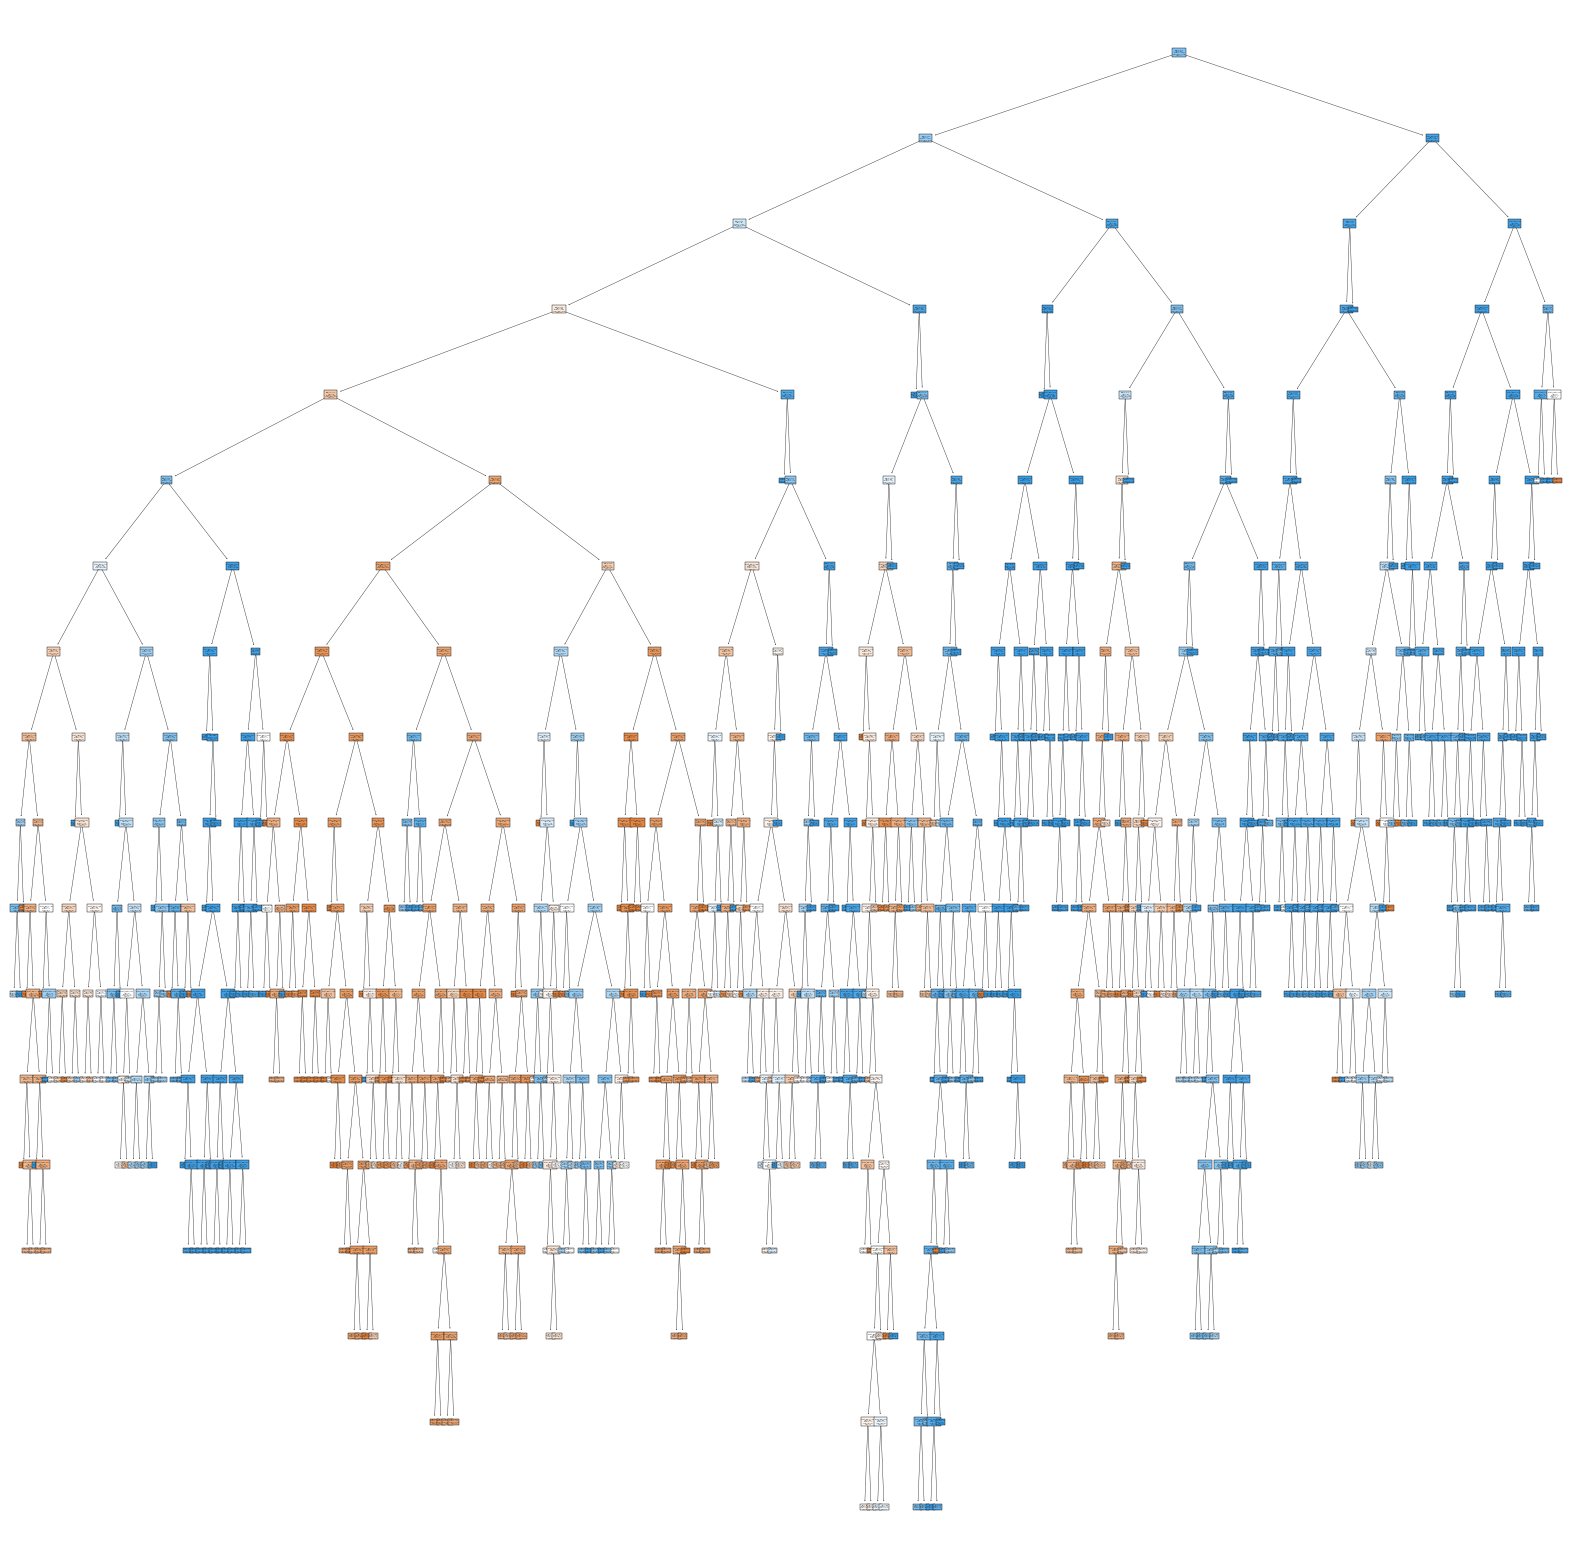

In [ ]:
# prepare feature names
feature_names = ['patient_state', 'patient_age', 'patient_gender', 'diag_list', 'diag_2',
       'diag_3', 'diag_4', 'diag_5', 'ndc = 1']

# Draw the decision tree
plt.figure(figsize=(20,20))
tree.plot_tree(clf, filled=True, feature_names=feature_names, class_names=['0','1'])
plt.show()


- Insights
Based on the picture, it seems it might be over fitting

## 7. Medical Cost Prediction

Particularly choose geographical, age, gender and the type of payment channel as features.

In [ ]:
df_3 = df_3 = data1[["journey_id", "visit_id", 'patient_state', "patient_short_zip", 'patient_age', 'patient_gender', 'payor_channel', 'claim_charge']]

In [ ]:
# Check the basic information
df_3.head()

journey_id  \
0  00006390c96ebfffed580074c35a16a7   
1  00006390c96ebfffed580074c35a16a7   
2  00006390c96ebfffed580074c35a16a7   
3  00006390c96ebfffed580074c35a16a7   
4  00006d564a4718c744f1bbf1b6c5f8c3   

                                            visit_id patient_state  \
0  f22b7ab885c44afae5449d74f8498f53aea1b2cfa79598...            CA   
1  f22b7ab885c44afae5449d74f8498f53aea1b2cfa79598...            CA   
2  3f45ba8ebef02b0c09b09e864e57ba5ee9d6bc9acf1c39...            CA   
3  3f45ba8ebef02b0c09b09e864e57ba5ee9d6bc9acf1c39...            CA   
4  9e4534892128401c693a6ab2ea758cd6a0a6484972168b...            CA   

   patient_short_zip  patient_age patient_gender     payor_channel  \
0              922.0         55.0              M  managed medicaid   
1              922.0         55.0              M  managed medicaid   
2              922.0         60.0              M        commercial   
3              922.0         60.0              M        commercial   
4              900.0         55.0              F        commercial   

   claim_charge  
0        300.00  
1        300.00  
2          0.00  
3          0.00  
4         88.07

In [ ]:
# data cleaning: Cleaning the missing values
cols_to_drop=[]
def display_missing_perc(df):
    for col in df.columns.tolist():
        missing_value = 100*(df[col].isnull().sum()/len(df[col]))
        print(f'{col} column missing values: {missing_value}')
        if missing_value >= 40:
            cols_to_drop.append(col)
    print('\n')
display_missing_perc(df_3)

journey_id column missing values: 0.0
visit_id column missing values: 0.30070967483260497
patient_state column missing values: 0.0
patient_short_zip column missing values: 0.0020849204121727275
patient_age column missing values: 1.0496772382823463
patient_gender column missing values: 0.02116996110821539
payor_channel column missing values: 6.004410408564211
claim_charge column missing values: 0.0




In [ ]:
## Fill missing values with mean
df_3['patient_age'] = df_3['patient_age'].fillna(df_3['patient_age'].mean())

## Drop rows with the data contains missing values
df_3 = df_3.dropna(subset = ['visit_id', 'patient_short_zip','patient_gender', 'payor_channel'])

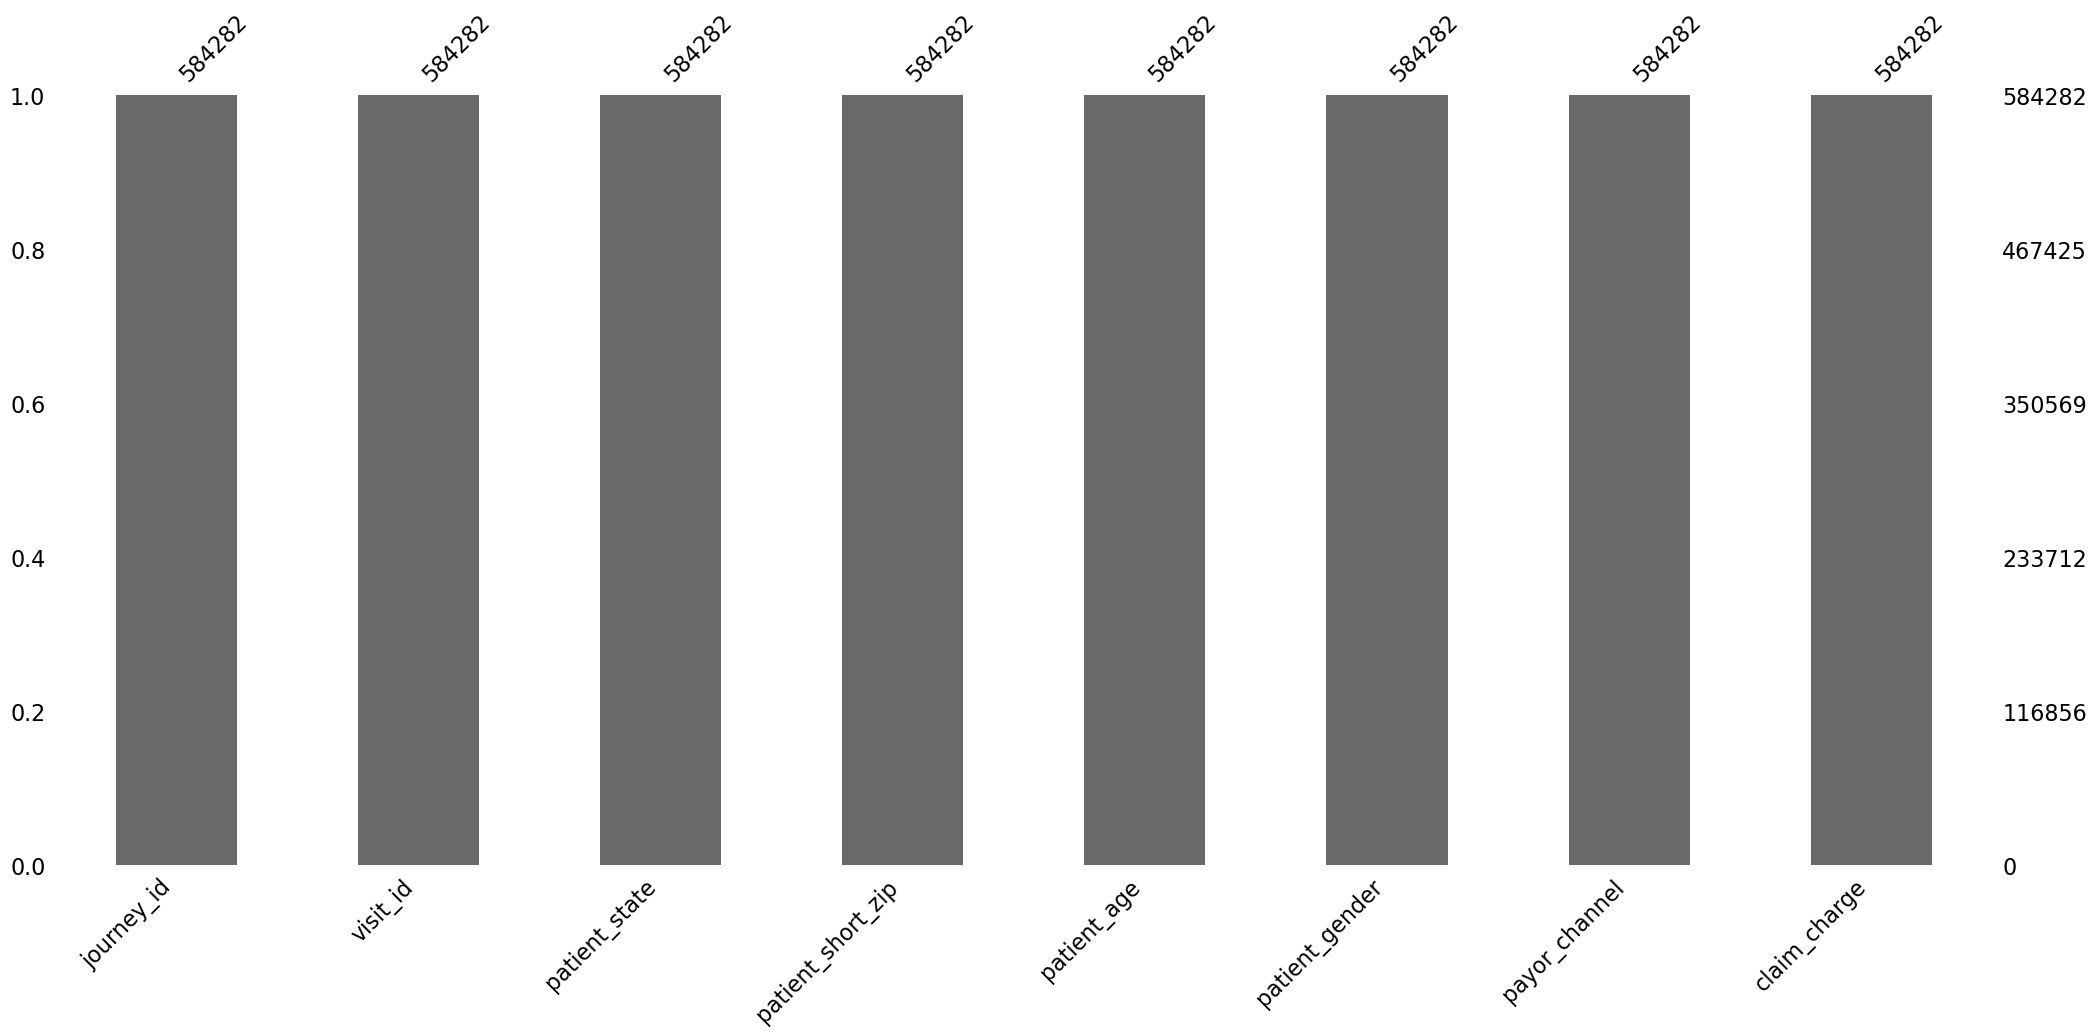

In [ ]:
# checking missing values
import missingno as msno
msno.bar(df_3)
plt.show()

In [ ]:
df_3 = df_3.drop_duplicates()

In [ ]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 449968 entries, 0 to 623524
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   journey_id         449968 non-null  object 
 1   visit_id           449968 non-null  object 
 2   patient_state      449968 non-null  object 
 3   patient_short_zip  449968 non-null  float64
 4   patient_age        449968 non-null  float64
 5   patient_gender     449968 non-null  object 
 6   payor_channel      449968 non-null  object 
 7   claim_charge       449968 non-null  float64
dtypes: float64(3), object(5)
memory usage: 30.9+ MB


In [ ]:
df_3.describe()

patient_short_zip    patient_age   claim_charge
count      449968.000000  449968.000000  449968.000000
mean          907.607954      59.223737     556.511884
std            40.104469       9.908237    4021.533263
min            74.000000      30.000000       0.000000
25%           900.000000      50.000000      22.500000
50%           911.000000      60.000000      88.070000
75%           922.000000      65.000000     240.000000
max           999.000000      80.000000  778750.000000

In [ ]:
# Calculate Q1 and Q3
Q1 = df_3['claim_charge'].quantile(0.25)
Q3 = df_3['claim_charge'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_3_f = df_3[(df_3['claim_charge'] >= lower_bound) & (df_3['claim_charge'] <= upper_bound)]

mu charges : 556.5118840450875, sigma charges : 4021.5287939172526


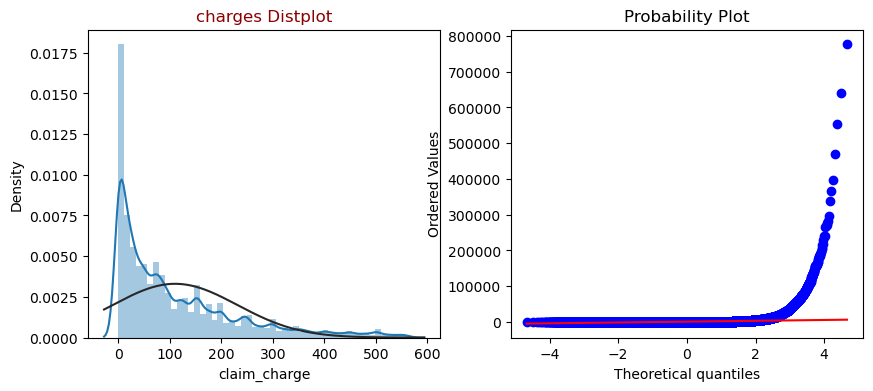

In [ ]:
import scipy.stats as stats
(mu, sigma) = norm.fit(df_3["claim_charge"])
print("mu {} : {}, sigma {} : {}".format("charges", mu, "charges", sigma))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(df_3_f["claim_charge"], fit=norm)
plt.title("charges Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(df_3["claim_charge"], plot = plt)
plt.show()

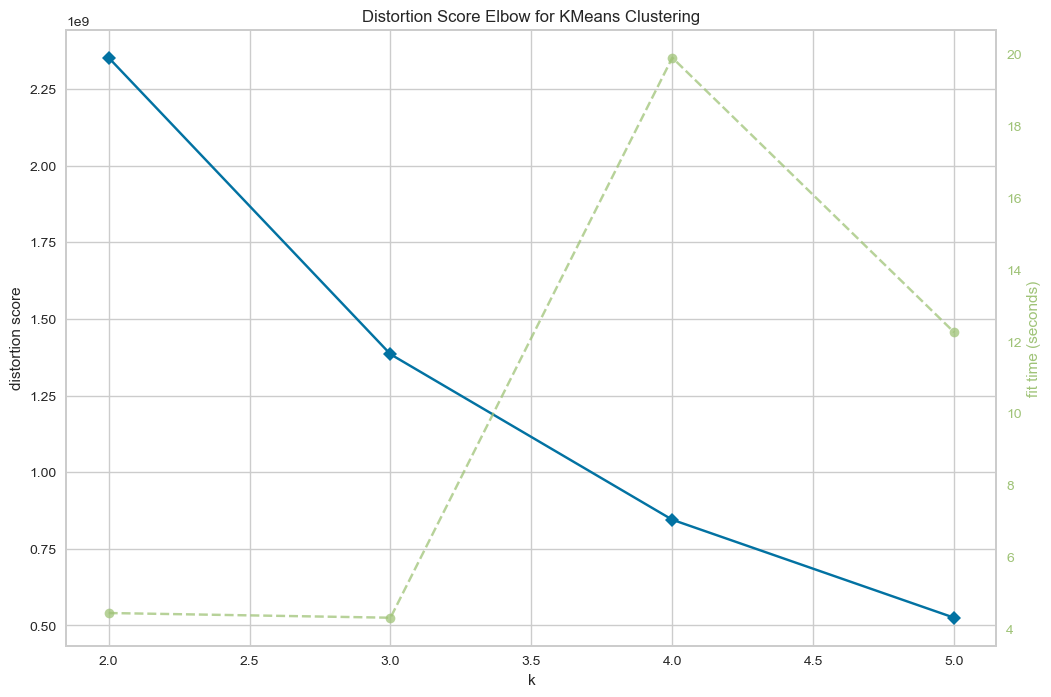

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

fig = plt.figure(figsize=(12,8))

# KNears Neighbors
df_3_f.head()

X = df_3_f[["patient_short_zip", "claim_charge"]]


# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,6))

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()

The elbow chart shows after k = 3.0, the decreasing of  distribution score becomes stable, so we choose k = 3.

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [ ]:
# Printing the Centroids
print(kmeans.cluster_centers_)

[[907.81632095 389.52170994]
 [907.6020255   35.31725093]
 [907.96033087 177.92085085]]


In [ ]:
print(kmeans.labels_)

[0 1 1 ... 2 1 2]


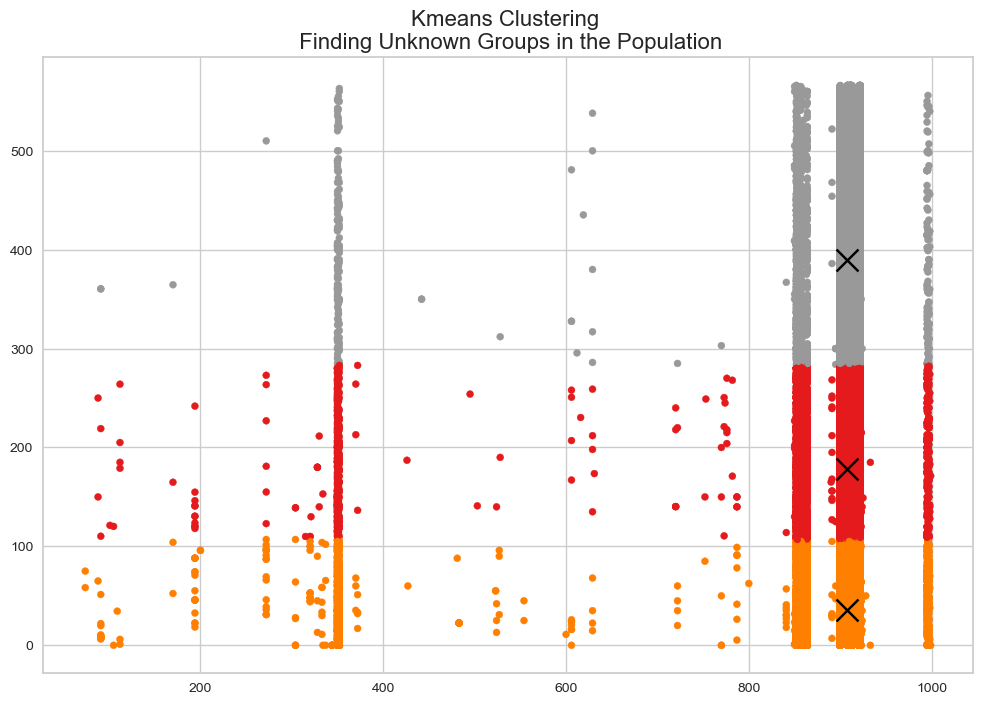

In [ ]:
fig = plt.figure(figsize=(12,8))

plt.scatter(X.values[:,0], X.values[:,1], c=kmeans.labels_, cmap="Set1_r", s=25)
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black', marker="x", s=250)
plt.title("Kmeans Clustering \n Finding Unknown Groups in the Population", fontsize=16)
plt.show()

- Insight
  
There may be significant differences in claim charges based on patients' locations, as suggested by the clusters' alignment along the 'short zip' axis. The spread of 'claim charge' values within each cluster varies, but there appears to be a cluster (in red) with particularly high 'claim charges'. This could represent a group of patients with more expensive medical costs.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'payor_channel' column
df_3_f['payor_channel'] = label_encoder.fit_transform(df_3_f['payor_channel'])
df_3_f['patient_gender'] = label_encoder.fit_transform(df_3_f['patient_gender'])
df_3_f['patient_state'] = label_encoder.fit_transform(df_3_f['patient_state'])

# Print the result
df_3_f

journey_id  \
0       00006390c96ebfffed580074c35a16a7   
2       00006390c96ebfffed580074c35a16a7   
4       00006d564a4718c744f1bbf1b6c5f8c3   
5       00006d564a4718c744f1bbf1b6c5f8c3   
6       00006d564a4718c744f1bbf1b6c5f8c3   
...                                  ...   
623506  1fff36b69093f3ece1c2426183acaf31   
623513  1fff36b69093f3ece1c2426183acaf31   
623520  1fffbb8b7e6a6c38cf97dafe3c5bc1cc   
623521  1fffbb8b7e6a6c38cf97dafe3c5bc1cc   
623524  1fffcb3288827e67d70ac1f368f050f8   

                                                 visit_id  patient_state  \
0       f22b7ab885c44afae5449d74f8498f53aea1b2cfa79598...              4   
2       3f45ba8ebef02b0c09b09e864e57ba5ee9d6bc9acf1c39...              4   
4       9e4534892128401c693a6ab2ea758cd6a0a6484972168b...              4   
5       3b0f0f71ac05c34ab9307c4853f1af59420c07b522cdf2...              4   
6       b058872fef09e56b8cb2884d0efb176b40d74e0ab9958f...              4   
...                                                   ...            ...   
623506  96ce48f195a7ffe610586df6b0454aab2e29e539181483...              4   
623513  e95a76ddd5ad47977dfa66fb59aac55c85af42c56399b0...              4   
623520  c45c2ba5fa8c97f5dd9e39064496898a54e7c82624ac9e...              4   
623521  a6cd72b2886f6ca2214157a2771350882833506a015485...              4   
623524  b9f23c864b1b11ca1e16706536d7ec6d316a13280a5dc3...              4   

        patient_short_zip  patient_age  patient_gender  payor_channel  \
0                   922.0         55.0               1              1   
2                   922.0         60.0               1              0   
4                   900.0         55.0               0              0   
5                   900.0         50.0               0              0   
6                   900.0         50.0               0              0   
...                   ...          ...             ...            ...   
623506              910.0         65.0               0              0   
623513              910.0         65.0               0              0   
623520              922.0         50.0               1              0   
623521              922.0         45.0               1              0   
623524              921.0         65.0               1              1   

        claim_charge  
0             300.00  
2               0.00  
4              88.07  
5             107.00  
6               0.01  
...              ...  
623506        250.00  
623513          2.94  
623520        175.00  
623521          0.00  
623524        263.00  

[395169 rows x 8 columns]

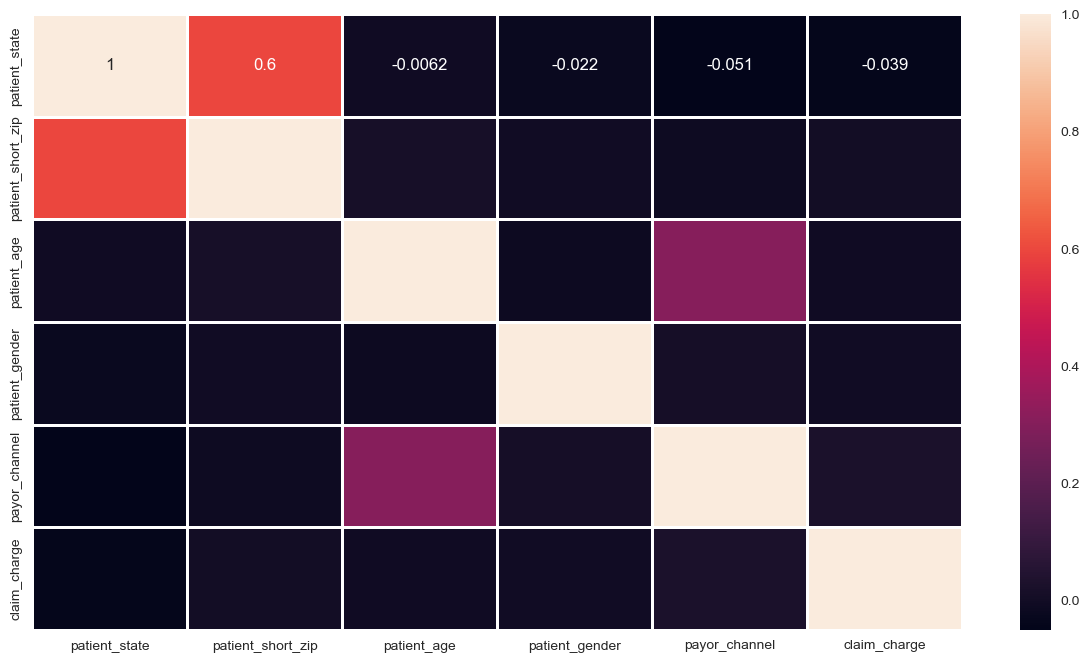

In [ ]:
# Draw a heatmep to see if there are some correlation between dependent variables and independent variables
plt.figure(figsize = (15, 8))

df_3_n = df_3_f.iloc[:, 2:]

sns.heatmap(df_3_n.corr(), annot = True, linewidths = 1)
plt.show()

In [ ]:
# Split the dataset into dependent variables and target variable
X = df_3_f[['patient_age', 'patient_short_zip', 'patient_gender', 'patient_state', 'payor_channel']]

n_samples = len(X)

X = np.hstack((np.ones((n_samples, 1)), X))

y = df_3_f['claim_charge'].values

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fitting column transformer on training data
scaler.fit(X_train)

# transforming training and test data with normalizing (MinMaxScaler) and one hot encodig (OneHotEncoder)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# creating a model using the Sequential API
import tensorflow as tf

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(200, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(50, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(50, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

# compiling the model
model_2.compile(loss=tf.keras.losses.mean_absolute_error, optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['mae'])

# fit the model
model_history = model_2.fit(X_train, Y_train, epochs=10)

Epoch 1/10
9880/9880 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 88.6147 - mae: 88.6147
Epoch 2/10
9880/9880 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 87.7183 - mae: 87.7183
Epoch 3/10
9880/9880 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 88.0058 - mae: 88.0058
Epoch 4/10
9880/9880 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 87.5269 - mae: 87.5269
Epoch 5/10
9880/9880 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 87.5086 - mae: 87.5086
Epoch 6/10
9880/9880 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 87.5860 - mae: 87.5860
Epoch 7/10
9880/9880 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 87.7794 - mae: 87.7794
Epoch 8/10
9880/9880 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 87.5323 - mae: 87.5323
Epoch 9/10
9880/9880 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 87.8825 - mae: 87.8825
Epoch 10/10
9880/9880 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 87.6201 - mae: 87.6201


In [ ]:
test_loss, test_mae = model_2.evaluate(X_test, Y_test)

2470/2470 ━━━━━━━━━━━━━━━━━━━━ 2s 762us/step - loss: 87.2038 - mae: 87.2038


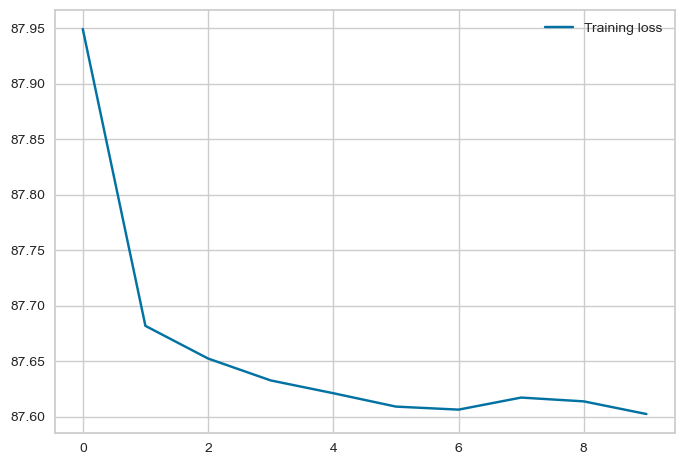

In [ ]:
plt.plot(model_history.history['loss'], label='Training loss')
plt.legend()
plt.show()

Initially, there is a steep decrease in the training loss, which suggests that the model is quickly learning from the training data. The plot shows low variability in loss after the initial epochs, which could be a good sign of model stability.

In [ ]:
model_2.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                │ (None, 300)            │         2,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 200)            │        60,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 50)             │        10,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 10)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 226,265 (883.85 KB)

 Trainable params: 75,421 (294.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 150,844 (589.24 KB)

- Insight
  
The total number of parameters in the model is 226,265. Of these, 75,421 are trainable parameters, which means they will be updated during training to minimize the loss function. The remaining 150,844 parameters are attributed to the optimizer's state.
No non-trainable parameters are present, indicating that all the parameters in the model can be updated during training